# Data Mining - Insurance Project
**Group Members**:
- Canhoto, Vera (m20210659@novaims.unl.pt)
- Correa, Lucas (m20211006@novaims.unl.pt)
- Shin, Doyun (m20200565@novaims.unl.pt)

In [1]:
# Jupyter notebook display size adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<a class="anchor" id="0.1"></a>

# **Table of Contents**

Structured as per CRISP-DM method, but it was used flexibly to better reflect the focus of the project. Further qualitative elements are addressed in the report attached where applicable.

1. [Business Understanding](#1)
   - 1.1 [Business Objectives](#1.1)
   - 1.2 [Situation Assessment](#1.2)
   - 1.3 [Data Mining Goals](#1.3)
   - 1.4 [Project Plan](#1.4)


2. [Data Understanding](#2)
   - 2.1 [Initial Data Collection](#2.1)
   - 2.2 [Data Description](#2.2)
   - 2.3 [Data Exploration](#2.3)
   - 2.4 [Data Quality Verification](#2.4)
  
  
3. [Data Preparation](#3)
   - 3.1 [Data Selection](#3.1)
   - 3.2 [Data Cleaning](#3.2) 
   - 3.3 [Data Construction](#3.3) 
   - 3.4 [Data Integration](#3.4) 
   - 3.5 [Data Formatting](#3.5)
   - 3.6 [Dataset Description](#3.6)
   
   
4. [Modeling](#4)
   - 4.1 [Modeling Technique Selection](#4.1) 
   - 4.2 [Test Design](#4.2)
   - 4.3 [Model Building](#4.3)
   - 4.4 [Model Assessment](#4.4)
   
   
5. [Evaluation](#5)
   - 5.1 [Evaluate Results](#5.1)
   - 5.2 [Review Process](#5.2)
   - 5.3 [Next Steps](#5.3)
 

# 1. Business Understanding <a class="anchor" id="1"></a>

## 1.1 Business Objective <a class="anchor" id="1.1"></a>

To better understand customer profiles, especially from the marketing department's perspectives.

## 1.2 Situation Assessment <a class="anchor" id="1.2"></a>

**Computational power**

Computer1: 

Computer2: 

Computer3: 
- CPU: Intel(R) Core i5-8250U CPU
- Memory: 8GB
- GPU: Intel UHD Graphics 620
    
No significant hindrance identified in the initial stage, considering the size of the data and the required task.

**Programming Language:** Python

**Available / utilized libraries**

In [161]:
import pandas as pd
import numpy as np
import math
from math import ceil
import statsmodels.api as sm
import scipy as sp
from scipy import stats
from scipy.stats import chi2



# Data Exploration
from pandas_profiling import ProfileReport

# Missing Values imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# outliers
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from pyod.models.copod import COPOD as COF
from statsmodels import robust

# Preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Clustering
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans


# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import set_link_color_palette


# Visualization
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option("display.max_rows", 20)

## 1.3 Data Mining Goals  <a class="anchor" id="1.3"></a>

In [3]:
# Conduct customer segmentation on the customer data => data mining problem type is segmentation


## 1.4 Project Plan  <a class="anchor" id="1.4"></a>

In [4]:
# possible clustering techniques: KNN or K-prototype, dependig on the data.

# 2. Data Understanding <a class="anchor" id="2"></a>

## 2.1 Initial Data Collection <a class="anchor" id="2.1"></a>

We have only one source of data hence assessment of potential quality problem from data merge is not applicable

In [5]:
df = pd.read_sas('a2z_insurance.sas7bdat')
orglen = len(df)
df.tail()

CustID  FirstPolYear  BirthYear         EducDeg  MonthSal  GeoLivArea  \
10291  10292.0        1984.0     1949.0      b'4 - PhD'    3188.0         2.0   
10292  10293.0        1977.0     1952.0    b'1 - Basic'    2431.0         3.0   
10293  10294.0        1994.0     1976.0  b'3 - BSc/MSc'    2918.0         1.0   
10294  10295.0        1981.0     1977.0    b'1 - Basic'    1971.0         2.0   
10295  10296.0        1990.0     1981.0      b'4 - PhD'    2815.0         1.0   

       Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
10291       0.0       -0.11        0.96     393.74          49.45      173.81   
10292       0.0     1405.60        0.00     133.58        1035.75      143.25   
10293       1.0      524.10        0.21     403.63         132.80      142.25   
10294       1.0      250.05        0.65     188.59         211.15      198.37   
10295       1.0      463.75        0.27     414.08          94.45      141.25   

       PremLife  PremWork  
10291      9.78     14.78  
10292     12.89    105.13  
10293     12.67      4.89  
10294     63.90    112.91  
10295      6.89     12.89

## 2.2 Data Description  <a class="anchor" id="2.2"></a>
Based on the metadata provided with some errors in the project description was corrected (eg., all the variable names, description of Birthday was "Customer’s first policy", etc)

Data on 10,290 Customers of the insurance company

| Name | Meaning | Additional Info | 
| :--: | :--------| :--------| 
| CustID | ID | - | 
| FirstPolYear | Year of the customer's first policy | May be considered as the first year as a customer |
| Birthday | Customer's birthday | The current year of the database is 2016|
| EducDeg | Academic Degree | - |
| MonthSal | Gross monthly salary (€) | - |
| GeoLivArea | Living area | No further information provided about the meaning of the area codes |
| Children | Binary variable (Y=1) | - |
| CustMonVal | Customer Monetary Value | Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost) |
| ClaimsRate | Claims Rate| Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years|
| PremMotor | Premiums (€) in LOB: Motor | Annual Premiums (2016) Negative premiums may manifest reversals occurred in the current year, paid in previous one(s). Applicable to all Prem* variables |
| PremHousehold | Premiums (€) in LOB: Household | * |
| PremHealth | Premiums (€) in LOB: Health | * |
| PremLife | Premiums (€) in LOB: Life | * |
| PremWork | Premiums (€) in LOB: Work| * |

## 2.3 Data Exploration  <a class="anchor" id="2.3"></a>

In [6]:
# Check default import data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe().T

count         mean          std        min      25%      50%  \
CustID         10296.0  5148.500000  2972.343520       1.00  2574.75  5148.50   
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
CustID         7722.2500  10296.00  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [8]:
# Check the number of entries.
df.shape

(10296, 14)

**Inconsistency in the number of customers**

The data was supposed to have 10290 records, hence a check is needed.

In [9]:
# The number of rows exceeds the number of customers by 6. Check for duplicates excluding CustID (unique)
tmp = df.loc[:, df.columns != 'CustID']
tmp.drop_duplicates()
tmp

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0            1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1            1981.0     1995.0  b'2 - High School'     677.0         4.0   
2            1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3            1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4            1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   
...             ...        ...                 ...       ...         ...   
10291        1984.0     1949.0          b'4 - PhD'    3188.0         2.0   
10292        1977.0     1952.0        b'1 - Basic'    2431.0         3.0   
10293        1994.0     1976.0      b'3 - BSc/MSc'    2918.0         1.0   
10294        1981.0     1977.0        b'1 - Basic'    1971.0         2.0   
10295        1990.0     1981.0          b'4 - PhD'    2815.0         1.0   

       Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0           1.0      380.97        0.39     375.85          79.45      146.36   
1           1.0     -131.13        1.12      77.46         416.20      116.69   
2           0.0      504.67        0.28     206.15         224.50      124.58   
3           1.0      -16.99        0.99     182.48          43.35      311.17   
4           1.0       35.23        0.90     338.62          47.80      182.59   
...         ...         ...         ...        ...            ...         ...   
10291       0.0       -0.11        0.96     393.74          49.45      173.81   
10292       0.0     1405.60        0.00     133.58        1035.75      143.25   
10293       1.0      524.10        0.21     403.63         132.80      142.25   
10294       1.0      250.05        0.65     188.59         211.15      198.37   
10295       1.0      463.75        0.27     414.08          94.45      141.25   

       PremLife  PremWork  
0         47.01     16.89  
1        194.48    106.13  
2         86.35     99.02  
3         35.34     28.34  
4         18.78     41.45  
...         ...       ...  
10291      9.78     14.78  
10292     12.89    105.13  
10293     12.67      4.89  
10294     63.90    112.91  
10295      6.89     12.89  

[10296 rows x 13 columns]

Confirmed later by the provider of the data there it was a rounding error.

In [10]:
# Check for duplicates of the unique customer ID
df.duplicated(subset='CustID').sum()

0

In [11]:
# EducDeg appears to be ordinal. In which case, it would be better to convert it before producing profile report. (Normally would be included in Feature Engineering section)
df.EducDeg.unique()

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

In [12]:
# Decode to handle bytes then extract the numerical characters and replace the string to numerical, ordinal variable.
df['EducDeg'] = df['EducDeg'].str.decode('UTF-8').str.extract('(\d+)', expand=False)
df

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  \
0          1.0        1985.0     1982.0       2    2177.0         1.0   
1          2.0        1981.0     1995.0       2     677.0         4.0   
2          3.0        1991.0     1970.0       1    2277.0         3.0   
3          4.0        1990.0     1981.0       3    1099.0         4.0   
4          5.0        1986.0     1973.0       3    1763.0         4.0   
...        ...           ...        ...     ...       ...         ...   
10291  10292.0        1984.0     1949.0       4    3188.0         2.0   
10292  10293.0        1977.0     1952.0       1    2431.0         3.0   
10293  10294.0        1994.0     1976.0       3    2918.0         1.0   
10294  10295.0        1981.0     1977.0       1    1971.0         2.0   
10295  10296.0        1990.0     1981.0       4    2815.0         1.0   

       Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0           1.0      380.97        0.39     375.85          79.45      146.36   
1           1.0     -131.13        1.12      77.46         416.20      116.69   
2           0.0      504.67        0.28     206.15         224.50      124.58   
3           1.0      -16.99        0.99     182.48          43.35      311.17   
4           1.0       35.23        0.90     338.62          47.80      182.59   
...         ...         ...         ...        ...            ...         ...   
10291       0.0       -0.11        0.96     393.74          49.45      173.81   
10292       0.0     1405.60        0.00     133.58        1035.75      143.25   
10293       1.0      524.10        0.21     403.63         132.80      142.25   
10294       1.0      250.05        0.65     188.59         211.15      198.37   
10295       1.0      463.75        0.27     414.08          94.45      141.25   

       PremLife  PremWork  
0         47.01     16.89  
1        194.48    106.13  
2         86.35     99.02  
3         35.34     28.34  
4         18.78     41.45  
...         ...       ...  
10291      9.78     14.78  
10292     12.89    105.13  
10293     12.67      4.89  
10294     63.90    112.91  
10295      6.89     12.89  

[10296 rows x 14 columns]

In [13]:
# Pandas prifiling - disabled after the initial report 
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("DM_PandasProfile.html")
#profile.to_notebook_iframe()

**Consideration A**

A1. Some decimal values such as year variable may just be integers. Need to investigate the nature of those values and required treatment (eg., if there's year 1975.7, it can't just be rounded to 1976 without knowing the nature of this entry)<br>
A2. Presence of extreme values that are obviously impossible (fails coherence check) in FirstPolYear and BirthYear.<br>
A3. Outliers that are theoretically possible (or uncertain whether it's impossible), hence requiring further investigation in MonthSal, ClaimsRate, and Prem variables.<br>
A4. EducDeg can be converted to numerical, ordinal variable<br>
A5. GeoLivArea and Children == Categorical (should be converted from float to object type)<br>
A6. Some missing values in most variables<br>
A7. There are 10296 entries instead of 10290 entries as stated in the project description. Quick duplicate check did not reveal any reason behind it. Needs to be confirmed (UPDATE 21 Oct: Consider it a rounding error)<br>


The section below investigates these considerations:

## 2.4 Data Quality Verification  <a class="anchor" id="2.4"></a>

### 2.4.1 Decimal values check  <a class="anchor" id="2.4.1"></a>

In regards to Consideration A1

In [14]:
# Check 
tmp = int(len(df)) # max length

# Instead of counting what is not an integer, we need to count what IS an integer and subtract from the max length due to the presence of NAN values.
for column in df:
    if (df[column].dtype) == "float64":
        only_num = [num for num in df[column] if num % 1 == 0]
        count = tmp-len(only_num)
        print('{}: {}'.format(column, count))  
        

CustID: 0
FirstPolYear: 30
BirthYear: 17
MonthSal: 36
GeoLivArea: 1
Children: 21
CustMonVal: 9653
ClaimsRate: 9777
PremMotor: 10296
PremHousehold: 9205
PremHealth: 10294
PremLife: 9433
PremWork: 9376


In [15]:
# Compare with null values. The result shows some columns--CustID, FirstPolYear, BirthYear, MonthSal, GeoLivArea, Children
# are just integers mixed with nulls.
df.isnull().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

**Missing Values in PremMotor, PremHealth, PremLife, PremWork**

In [16]:
# Count number of zeros in all columns of Dataframe
for c in df.columns:
    column = df[c]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Number of zeros in column', c, ' is : ', count)

Number of zeros in column CustID  is :  0
Number of zeros in column FirstPolYear  is :  0
Number of zeros in column BirthYear  is :  0
Number of zeros in column EducDeg  is :  0
Number of zeros in column MonthSal  is :  0
Number of zeros in column GeoLivArea  is :  0
Number of zeros in column Children  is :  3013
Number of zeros in column CustMonVal  is :  2
Number of zeros in column ClaimsRate  is :  58
Number of zeros in column PremMotor  is :  0
Number of zeros in column PremHousehold  is :  60
Number of zeros in column PremHealth  is :  0
Number of zeros in column PremLife  is :  0
Number of zeros in column PremWork  is :  0


For the following reasons we will treat the missing values in Prem- variables as 0:
1. There is no missing value in Prem-Household, however, there are zeroes.
2. For all other Prem- variables it's the opposite: there are no zeroes, but only missing values.
3. We infer it's the company's internal practice to keep PremHousehold filled with a value at all times to prevent all values missing across all the prem-variables, but permit non-entry in other variables in case of 0 premium.
4. The number of missing values in Prem- variables is very low, at most 104 entries (PremLife, less than 1% of the data). Hence the impact of this inferrence is expected to be small to the overall quality of the data. We convert these missing values to 0.

### 2.4.2 Initial Coherence Check  <a class="anchor" id="2.4.2"></a>

**Min-max values**

In [17]:
# We can detect obviously impossible values from min - max values.
df.describe().loc[['min','max']]

CustID  FirstPolYear  BirthYear  MonthSal  GeoLivArea  Children  \
min      1.0        1974.0     1028.0     333.0         1.0       0.0   
max  10296.0       53784.0     2001.0   55215.0         4.0       1.0   

     CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
min  -165680.42         0.0      -4.11          -75.0       -2.11      -7.0   
max    11875.89       256.2   11604.42        25048.8    28272.00     398.3   

     PremWork  
min     -12.0  
max    1988.7

- The above indicates max value of FirstPolYear, minimum value of BirthYear are impossible values.

**FirstPolYear**

In [18]:
# The min value of FirstPolYear (1974) is a possible value. Hence only the largest value needs to be checked.
df.nlargest(5, 'FirstPolYear')

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
9294  9295.0       53784.0     1948.0       3    3268.0         1.0       0.0   
23      24.0        1998.0     1961.0       2    2870.0         4.0       1.0   
65      66.0        1998.0     1941.0       3    3760.0         1.0       0.0   
279    280.0        1998.0     1938.0       1    4386.0         1.0       0.0   
506    507.0        1998.0     1942.0       1    3743.0         1.0       0.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
9294      348.85        0.37     351.40           15.0      187.37     22.45   
23        290.05        0.64     222.04          329.5      248.38     48.01   
65        132.27        0.78     276.83          175.6      261.27      6.89   
279       193.04        0.79      96.02          541.2      189.59    127.69   
506       -46.67        1.02      85.24          554.0      307.39     46.12   

      PremWork  
9294     17.78  
23       33.56  
65       -6.11  
279      90.35  
506      24.45

No indication the data integrity is compromised, considering there's only one illogical value (53784). Dropping the row can be considered.

In [19]:
# Drop those two rows
df = df[df['FirstPolYear'] != 53784]

**BirthYear**

In [20]:
# The max value of BirthYear (2001) is possible. Check the mins. 
df.nsmallest(5, 'BirthYear')

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
7195  7196.0        1993.0     1028.0       3    2830.0         4.0       0.0   
329    330.0        1979.0     1935.0       2    4292.0         1.0       1.0   
958    959.0        1996.0     1935.0       1    4133.0         2.0       1.0   
1013  1014.0        1996.0     1935.0       3    4247.0         2.0       0.0   
3191  3192.0        1990.0     1935.0       3    4475.0         3.0       0.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
7195      146.02        0.77     428.97         192.80      108.91      1.89   
329       -47.77        1.04     457.64         -20.55       94.35     47.23   
958       594.33        0.38     257.05         511.20      129.58     29.56   
1013      -98.79        1.09     142.36         299.50      307.17     24.67   
3191      433.97        0.45     111.80         339.50      268.83    106.91   

      PremWork  
7195     23.67  
329      -1.11  
958      78.57  
1013     73.79  
3191     12.56

No indication the data integrity is compromised, considering there's only one illogical value (1028). Dropping the row can be considered or imputation from EducDeg.

In [21]:
# Drop those two rows
df = df[df['BirthYear'] != 1028]

In [22]:
df.describe().loc[['min','max']]

CustID  FirstPolYear  BirthYear  MonthSal  GeoLivArea  Children  \
min      1.0        1974.0     1935.0     333.0         1.0       0.0   
max  10296.0        1998.0     2001.0   55215.0         4.0       1.0   

     CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
min  -165680.42         0.0      -4.11          -75.0       -2.11      -7.0   
max    11875.89       256.2   11604.42        25048.8    28272.00     398.3   

     PremWork  
min     -12.0  
max    1988.7

**Cases of BirthYear < FirstPolYear, i.e., people born after the FirstPolYear**

In [23]:
# Check for entries where BirthYear < FirstPolYear (Assuming an unborn person cannot be insured)
df.query('FirstPolYear < BirthYear')

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  \
1          2.0        1981.0     1995.0       2     677.0         4.0   
13        14.0        1983.0     2000.0       1    1043.0         3.0   
18        19.0        1981.0     1982.0       1    1414.0         3.0   
22        23.0        1976.0     1986.0       2    1495.0         1.0   
40        41.0        1994.0     1995.0       2    1177.0         4.0   
...        ...           ...        ...     ...       ...         ...   
10268  10269.0        1987.0     1988.0       3    1414.0         3.0   
10273  10274.0        1989.0     1992.0       2    1035.0         1.0   
10284  10285.0        1980.0     1987.0       3    1504.0         4.0   
10288  10289.0        1982.0     1993.0       2    1465.0         1.0   
10290  10291.0        1994.0     1999.0       1     626.0         3.0   

       Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
1           1.0     -131.13        1.12      77.46         416.20      116.69   
13          1.0      -75.12        1.06      44.34         342.85      127.69   
18          1.0      230.38        0.71     313.17         373.40      121.80   
22          1.0      -89.79        1.08     209.04         308.95      192.48   
40          1.0      121.36        0.84      52.01         455.65      135.47   
...         ...         ...         ...        ...            ...         ...   
10268       1.0       50.46        0.90     129.58         167.80      184.48   
10273       1.0      293.51        0.58     235.71         195.60      103.13   
10284       1.0       -1.55        0.96     390.63          29.45      179.70   
10288       1.0      795.15        0.35      67.79         820.15      102.13   
10290       1.0      176.26        0.85       6.89         878.50      103.13   

       PremLife  PremWork  
1        194.48    106.13  
13       267.94     94.46  
18        14.78     72.57  
22        64.79     54.90  
40       146.36    148.03  
...         ...       ...  
10268    165.92     75.46  
10273    170.92     58.12  
10284     -6.00       NaN  
10288    182.48     86.46  
10290    113.02    201.26  

[1997 rows x 14 columns]

2160 rows = 21% of the total data. Data integrity may have been compromised, requires a clarification. Considering the originally incorrect description of BirthYear, this feature may be the problem rather than FirstPolYear.

In [24]:
yr_no_df = df.query('FirstPolYear < BirthYear').copy()

<AxesSubplot:xlabel='BirthYear'>

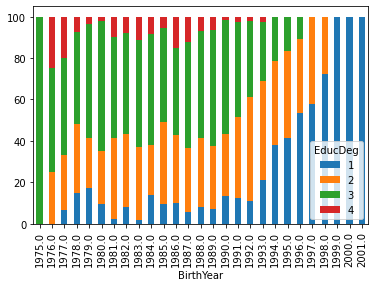

In [25]:
# Assumption 1: EducDeg should correspond with BirthYear
aggre= yr_no_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- The BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal

<AxesSubplot:xlabel='BirthYear'>

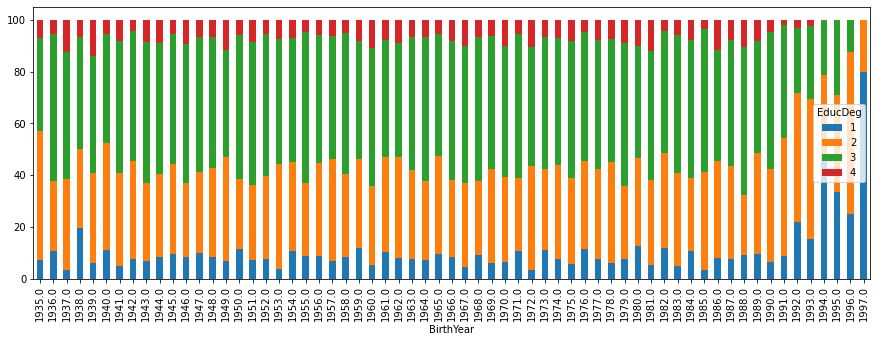

In [26]:
# Compare the trend where the coherence check pases
yr_ok_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre= yr_ok_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='BirthYear'>

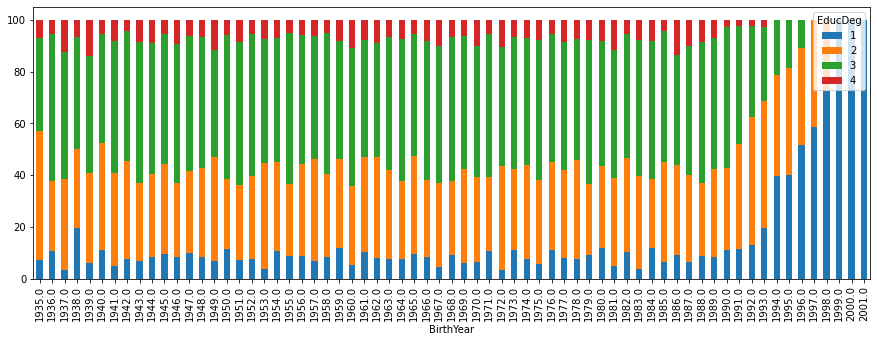

In [27]:
# Education Trend in all data
plt.rcParams['figure.figsize'] = [15, 5]
aggre= df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- Again to highlight: the BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal
- meaning, if we reject BrithYear variable, we should suspect EducDeg variable as well.

<AxesSubplot:xlabel='FirstPolYear'>

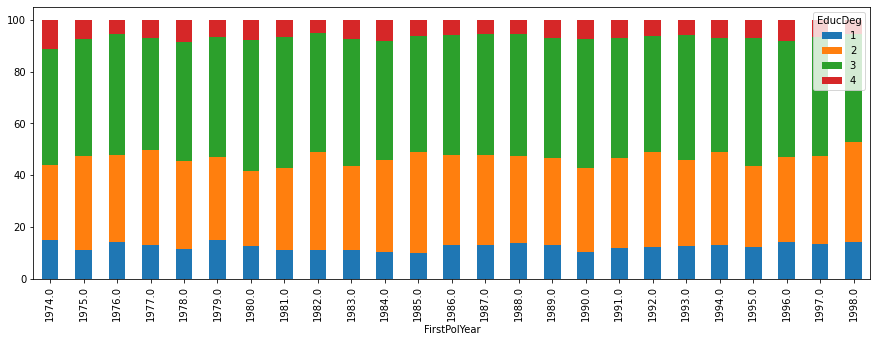

In [28]:
# Education Trend based on FirstPolYear
plt.rcParams['figure.figsize'] = [15, 5]
aggre= df[['FirstPolYear','EducDeg']].groupby(['FirstPolYear','EducDeg'])['FirstPolYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [29]:
# Assumption 2: Children should correspond with BirthYear
# Number of rows per birthyear
yr_no_df['BirthYear'].value_counts().sort_index()

1975.0      3
1976.0      4
1977.0     15
1978.0     27
1979.0     29
         ... 
1997.0    128
1998.0     94
1999.0     69
2000.0     35
2001.0     12
Name: BirthYear, Length: 27, dtype: int64

In [30]:
pd.set_option("display.max_rows", 28)
yr_no_df.groupby('BirthYear', as_index=False)['Children'].mean()

BirthYear  Children
0      1975.0  1.000000
1      1976.0  0.750000
2      1977.0  0.933333
3      1978.0  0.962963
4      1979.0  0.862069
5      1980.0  0.976744
6      1981.0  0.951220
7      1982.0  0.940000
8      1983.0  0.925926
9      1984.0  0.957746
10     1985.0  0.931507
11     1986.0  0.945055
12     1987.0  0.900000
13     1988.0  0.964706
14     1989.0  0.947917
15     1990.0  0.792000
16     1991.0  0.858407
17     1992.0  0.821705
18     1993.0  0.747826
19     1994.0  0.741259
20     1995.0  0.786260
21     1996.0  0.643411
22     1997.0  0.726562
23     1998.0  0.774194
24     1999.0  0.811594
25     2000.0  0.685714
26     2001.0  0.583333

In [31]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1975) & (yr_no_df["FirstPolYear"] < 1975)]

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
741    742.0        1974.0     1975.0       3    2039.0         3.0       1.0   
4721  4722.0        1974.0     1975.0       3    1939.0         4.0       1.0   
8427  8428.0        1974.0     1975.0       3    2348.0         1.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
741       453.87        0.17     479.98          14.45       83.35      0.89   
4721      -20.00        0.99     320.95          78.35      236.60      5.89   
8427      423.32        0.23     474.31         -15.55      106.91      5.89   

      PremWork  
741      -0.11  
4721      0.89  
8427     11.00

In [32]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1976) & (yr_no_df["FirstPolYear"] < 1976)]

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
924    925.0        1975.0     1976.0       4    1783.0         3.0       1.0   
5535  5536.0        1974.0     1976.0       3    2450.0         4.0       0.0   
8498  8499.0        1975.0     1976.0       2    1944.0         1.0       1.0   
9127  9128.0        1974.0     1976.0       3    1622.0         4.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
924        -1.21        0.96     488.87           8.90       87.46      0.89   
5535      533.32        0.34     151.25         310.05       60.90    115.91   
8498      -72.12        1.07     298.61          39.45      213.15      7.78   
9127      -40.00        1.03     514.32          -5.00       61.79     -5.00   

      PremWork  
924      14.89  
5535    212.93  
8498     86.57  
9127       NaN

In [33]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1977) & (yr_no_df["FirstPolYear"] < 1977)]

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
134    135.0        1976.0     1977.0       4    1810.0         2.0       1.0   
161    162.0        1975.0     1977.0       3    2285.0         1.0       0.0   
268    269.0        1976.0     1977.0       2    1697.0         4.0       1.0   
1812  1813.0        1976.0     1977.0       3    2223.0         1.0       1.0   
3216  3217.0        1975.0     1977.0       1    2196.0         1.0       1.0   
4891  4892.0        1975.0     1977.0       2    1920.0         1.0       1.0   
5388  5389.0        1976.0     1977.0       4    1810.0         2.0       1.0   
5491  5492.0        1976.0     1977.0       3    1858.0         1.0       1.0   
5526  5527.0        1974.0     1977.0       2    1949.0         4.0       1.0   
6213  6214.0        1976.0     1977.0       3    1601.0         1.0       1.0   
6668  6669.0        1974.0     1977.0       4    1696.0         1.0       1.0   
7494  7495.0        1975.0     1977.0       3    1803.0         4.0       1.0   
8732  8733.0        1974.0     1977.0       3    2272.0         1.0       1.0   
9091  9092.0        1976.0     1977.0       2    1856.0         4.0       1.0   
9240  9241.0        1975.0     1977.0       3    1978.0         1.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
134       543.21        0.14     490.98          79.45       86.35     -1.11   
161       471.21        0.25     349.40          87.80      142.47      9.78   
268       -42.67        1.02     331.84         177.80      181.70     44.12   
1812      -51.44        1.05     468.09         -20.55       95.13      2.89   
3216      179.26        0.73     204.26         234.50      178.81     24.45   
4891      432.74        0.51     222.04         408.40      127.58     69.68   
5388      -26.11        1.01        NaN          79.45       86.35     -1.11   
5491      -52.76        1.05     385.63          -6.10      159.14     26.56   
5526      -25.00        1.00     128.47         575.10      173.70     74.68   
6213      452.54        0.17     457.42          -0.55       99.02      0.89   
6668      547.54        0.11     506.54          55.00       72.57      3.00   
7494      474.20        0.30     313.95         152.80      209.04     18.78   
8732      426.31        0.34     464.42         118.90      112.02     -4.00   
9091      223.73        0.56     326.95         -50.00      222.93     37.34   
9240      -45.56        1.03     478.09           9.45       70.68     29.45   

      PremWork  
134       3.89  
161      68.79  
268      17.67  
1812      5.89  
3216    118.58  
4891    103.02  
5388      3.89  
5491     11.00  
5526     96.24  
6213     19.78  
6668      8.00  
7494     13.67  
8732     -5.11  
9091     21.78  
9240      8.89

In [34]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1978) & (yr_no_df["FirstPolYear"] < 1978)]

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
293    294.0        1977.0     1978.0       2    2128.0         1.0       1.0   
343    344.0        1976.0     1978.0       3     782.0         1.0       1.0   
1034  1035.0        1976.0     1978.0       3    1775.0         2.0       1.0   
1071  1072.0        1975.0     1978.0       2    2366.0         1.0       1.0   
1763  1764.0        1977.0     1978.0       1    2230.0         4.0       1.0   
1796  1797.0        1975.0     1978.0       2    1735.0         3.0       1.0   
1934  1935.0        1977.0     1978.0       3    1513.0         3.0       1.0   
2518  2519.0        1975.0     1978.0       2    2045.0         3.0       1.0   
3468  3469.0        1974.0     1978.0       2    1151.0         1.0       1.0   
3679  3680.0        1977.0     1978.0       1    2083.0         4.0       1.0   
3823  3824.0        1975.0     1978.0       2    2284.0         1.0       1.0   
4501  4502.0        1976.0     1978.0       2    1779.0         1.0       1.0   
4615  4616.0        1975.0     1978.0       4    1981.0         3.0       1.0   
4711  4712.0        1976.0     1978.0       4    1829.0         1.0       1.0   
4955  4956.0        1975.0     1978.0       2    1915.0         4.0       1.0   
4998  4999.0        1977.0     1978.0       2    2237.0         1.0       1.0   
6085  6086.0        1976.0     1978.0       3    1749.0         1.0       1.0   
6101  6102.0        1977.0     1978.0       3    1747.0         4.0       1.0   
6169  6170.0        1976.0     1978.0       3    1793.0         1.0       1.0   
6663  6664.0        1976.0     1978.0       3    2107.0         3.0       1.0   
7109  7110.0        1976.0     1978.0       1    2017.0         4.0       1.0   
8023  8024.0        1976.0     1978.0       3    1276.0         3.0       1.0   
8092  8093.0        1975.0     1978.0       3    2079.0         3.0       0.0   
8890  8891.0        1977.0     1978.0       3    1909.0         3.0       1.0   
9134  9135.0        1977.0     1978.0       3    1889.0         4.0       1.0   
9643  9644.0        1976.0     1978.0       1    1879.0         1.0       1.0   
9660  9661.0        1977.0     1978.0       3    1747.0         4.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
293       541.54        0.30     348.62         241.70      151.14     44.23   
343       413.41        0.47     185.48         300.05      298.50     24.45   
1034      187.38        0.72     222.71         230.05      295.61      6.00   
1071      357.08        0.32     397.63         -15.55      145.14     25.56   
1763      464.09        0.26     468.42          78.35       96.24      4.78   
1796      125.37        0.78     407.41         102.25      116.91     33.34   
1934      -53.98        1.05     410.52         -11.10      159.92       NaN   
2518      213.60        0.71     238.60         314.50      221.71     42.34   
3468     -189.78        1.30     370.18         -45.55      111.02     73.68   
3679      564.10        0.27     337.62         236.70      188.59     14.78   
3823      -13.00        0.98     461.53         167.80       83.35     27.56   
4501      -83.90        1.07     249.27         308.95      207.04     46.23   
4615      -11.22        0.98     425.97          83.90      115.69      7.78   
4711      337.85        0.46     390.74          93.90      179.70     -5.00   
4955      162.49        0.75     337.62         200.05      156.14     30.34   
4998      395.86        0.30     404.52          43.90      144.25     -5.00   
6085      485.99        0.19     442.64          68.35      103.02     12.67   
6101        3.57        0.95     407.52          43.35      145.25       NaN   
6169       20.34        0.93     446.64          34.45      115.69     10.89   
6663      -32.22        1.01     521.21          54.45       53.01     -1.11   
7109      283.05        0.65     365.29         335.05   

<AxesSubplot:xlabel='BirthYear'>

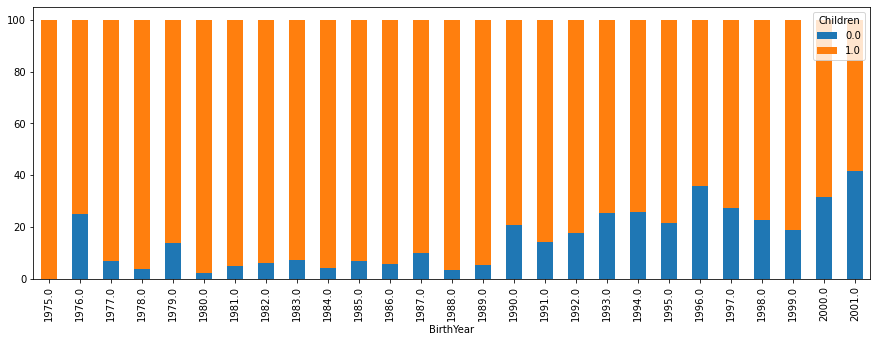

In [35]:
# Assumption 2: Children should correspond with BirthYear
aggre = yr_no_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [36]:
yr_no_df.count()

CustID           1997
FirstPolYear     1997
BirthYear        1997
EducDeg          1996
MonthSal         1985
GeoLivArea       1997
Children         1994
CustMonVal       1997
ClaimsRate       1997
PremMotor        1989
PremHousehold    1997
PremHealth       1985
PremLife         1985
PremWork         1981
dtype: int64

- significant ratio of people under age of 18 appear to have children. This may be illogical, but that may be due to the sampling bias--if you have a kid at very young age, you are highly likely to seek insurance coverage.

In [37]:
# If we only look at people who were adults when they made their first policy
adultfirstpol = df.copy()
adultfirstpol.insert(3, 'entryAge', (adultfirstpol['FirstPolYear'] - adultfirstpol['BirthYear']))
adultfirstpol = adultfirstpol.loc[(adultfirstpol["entryAge"] >= 18)]
len(adultfirstpol)

5194

<AxesSubplot:xlabel='BirthYear'>

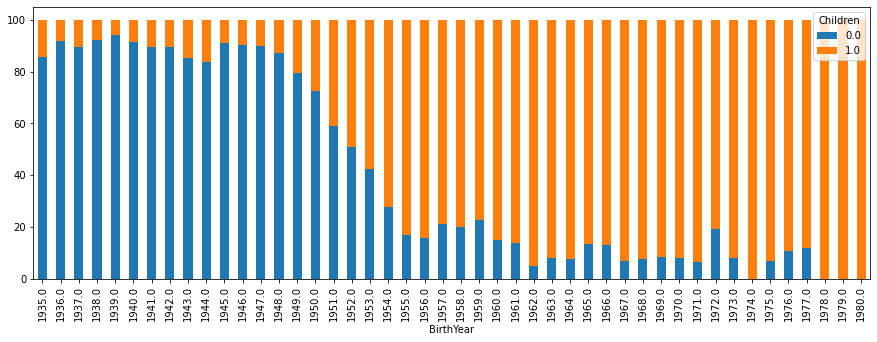

In [38]:
aggre = adultfirstpol[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='entryAge'>

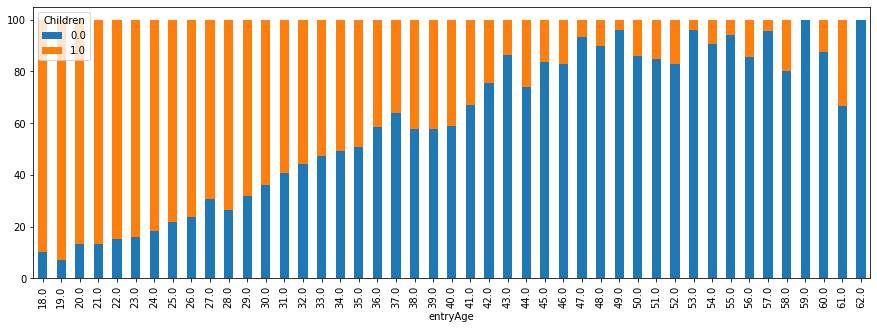

In [39]:
aggre = adultfirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [40]:
# If we only look at minimum age for insurance coverage
minagefirstpol = df.copy()
minagefirstpol.insert(3, 'entryAge', (minagefirstpol['FirstPolYear'] - minagefirstpol['BirthYear']))
minagefirstpol = minagefirstpol.loc[(minagefirstpol["entryAge"] >= 10)]
len(minagefirstpol)

6546

<AxesSubplot:xlabel='entryAge'>

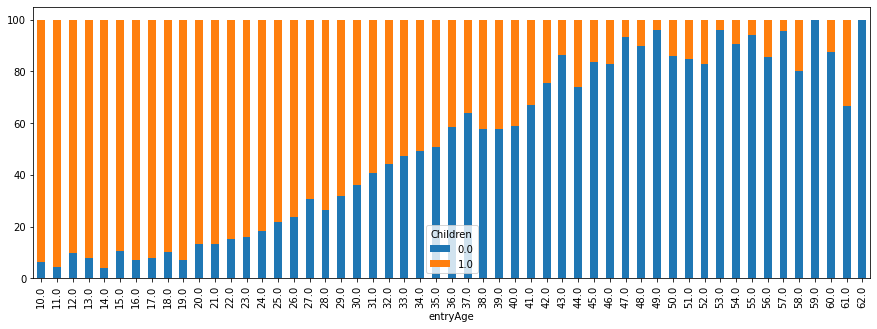

In [41]:
aggre = minagefirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [42]:
pd.set_option("display.max_rows", None)

In [43]:
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()
yrcheck_df['BirthYear'].value_counts().sort_index()

1935.0     14
1936.0     37
1937.0     57
1938.0     76
1939.0    100
1940.0    126
1941.0    145
1942.0    161
1943.0    163
1944.0    170
1945.0    165
1946.0    182
1947.0    170
1948.0    164
1949.0    178
1950.0    150
1951.0    185
1952.0    186
1953.0    192
1954.0    184
1955.0    171
1956.0    173
1957.0    173
1958.0    171
1959.0    171
1960.0    165
1961.0    155
1962.0    205
1963.0    186
1964.0    191
1965.0    160
1966.0    168
1967.0    179
1968.0    199
1969.0    130
1970.0    170
1971.0    149
1972.0    143
1973.0    163
1974.0    186
1975.0    173
1976.0    165
1977.0    168
1978.0    146
1979.0    134
1980.0    127
1981.0    149
1982.0    111
1983.0    103
1984.0    113
1985.0     85
1986.0     86
1987.0     78
1988.0     77
1989.0     74
1990.0     64
1991.0     46
1992.0     32
1993.0     39
1994.0     33
1995.0     24
1996.0      8
1997.0      5
Name: BirthYear, dtype: int64

<AxesSubplot:xlabel='BirthYear'>

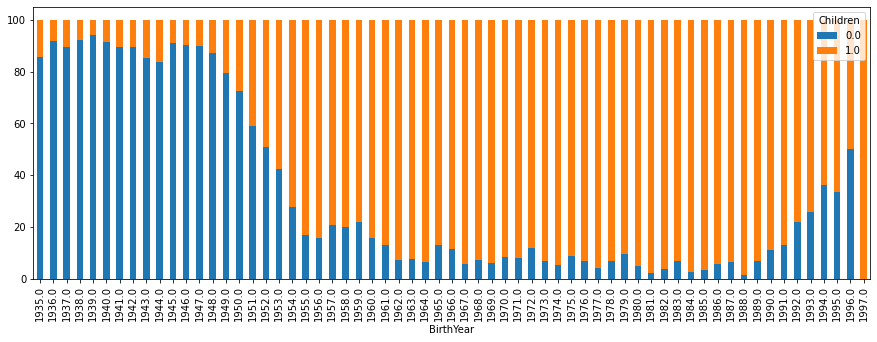

In [44]:
# Compare the trend where the coherence check pases
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre = yrcheck_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- All data from birthyear 1997 fails coherence test. In year 2016, these individuals are 19 years old. But the data refers to premium paid in 2016, meaning the year people born in 1997 entered the contract was 2015, when they were 18. Note, Age of 18 is the age you are no longer required parental consent to make an insurance policy.
- older you get, less likely you have children: Children variable may not be whether they have a child, but whether they have a child in the household. The graph above follows this trend.

<AxesSubplot:xlabel='BirthYear'>

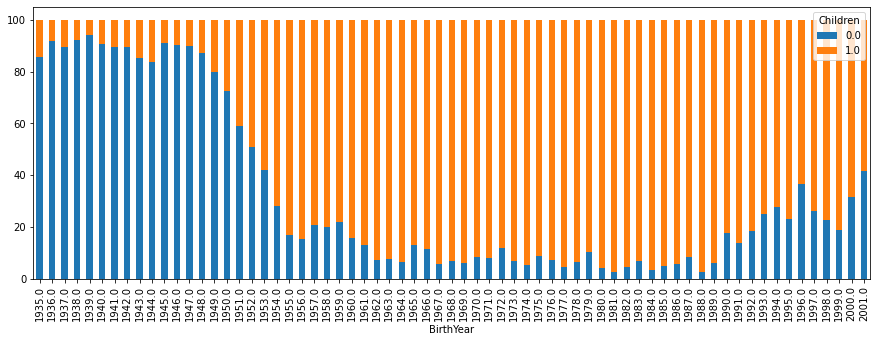

In [45]:
# Total trend
plt.rcParams['figure.figsize'] = [15, 5]
aggre = df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [46]:
len(df[(df['Children'] == 1) & (df['BirthYear'] == 1999)])

56

In [47]:
# You can be as young as 10 to enter an insurance policy as long as you have parental consent(needs to be checked for portugal)
# PremMotor check, since minimum age for driving is 16 in Portugal (motorcycle).
# PremWork, min working age is 16.
# It's premium 
df[(df['BirthYear'] > 1999)]

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
13      14.0        1983.0     2000.0       1    1043.0         3.0       1.0   
397    398.0        1986.0     2000.0       1     415.0         1.0       1.0   
659    660.0        1991.0     2001.0       1    1284.0         4.0       1.0   
689    690.0        1997.0     2001.0       1    1180.0         3.0       1.0   
865    866.0        1979.0     2001.0       1     562.0         1.0       1.0   
893    894.0        1978.0     2000.0       1     698.0         4.0       1.0   
900    901.0        1979.0     2000.0       1     845.0         1.0       1.0   
1336  1337.0        1996.0     2000.0       1    1057.0         4.0       0.0   
1436  1437.0        1989.0     2001.0       1     823.0         4.0       0.0   
1613  1614.0        1990.0     2000.0       1    1274.0         3.0       1.0   
1755  1756.0        1990.0     2000.0       1     939.0         3.0       1.0   
2443  2444.0        1996.0     2000.0       1     889.0         1.0       1.0   
2579  2580.0        1986.0     2001.0       1    1006.0         4.0       0.0   
2779  2780.0        1990.0     2000.0       1    1147.0         4.0       1.0   
3146  3147.0        1994.0     2001.0       1     372.0         4.0       1.0   
3154  3155.0        1983.0     2000.0       1     791.0         4.0       0.0   
3587  3588.0        1995.0     2000.0       1    1330.0         3.0       1.0   
4201  4202.0        1984.0     2000.0       1     833.0         3.0       1.0   
4249  4250.0        1984.0     2000.0       1     663.0         4.0       1.0   
4465  4466.0        1978.0     2001.0       1     958.0         4.0       0.0   
4483  4484.0        1983.0     2001.0       1    1241.0         3.0       1.0   
4639  4640.0        1979.0     2000.0       1    1235.0         4.0       1.0   
4699  4700.0        1985.0     2000.0       1     689.0         2.0       1.0   
4849  4850.0        1989.0     2000.0       1     555.0         4.0       1.0   
5347  5348.0        1980.0     2001.0       1    1119.0         3.0       1.0   
5431  5432.0        1975.0     2000.0       1    1259.0         3.0       0.0   
5607  5608.0        1974.0     2001.0       1    1131.0         3.0       0.0   
5627  5628.0        1986.0     2000.0       1     995.0         4.0       1.0   
5695  5696.0        1980.0     2000.0       1    1233.0         4.0       1.0   
6163  6164.0        1982.0     2000.0       1    1021.0         4.0       1.0   
6176  6177.0        1981.0     2000.0       1    1064.0         3.0       0.0   
6485  6486.0        1989.0     2000.0       1     860.0         4.0       0.0   
6545  6546.0        1995.0     2000.0       1     866.0         4.0       1.0   
7306  7307.0        1987.0     2000.0       1     622.0         3.0       1.0   
7404  7405.0        1997.0     2000.0       1     865.0         1.0       0.0   
7471  7472.0        1976.0     2000.0       1    1386.0         4.0       0.0   
7754  7755.0        1986.0     2000.0       1     995.0         4.0       1.0   
7879  7880.0        1990.0     2000.0       1    1082.0         3.0       0.0   
8099  8100.0        1987.0     2000.0       1     622.0         3.0       1.0   
8160  8161.0        1993.0     2000.0       1    1427.0         1.0       1.0   
8807  8808.0        1992.0     2000.0       1     358.0         4.0       0.0   
8962  8963.0        1978.0     2001.0       1    1117.0         4.0       0.0   
9037  9038.0        1982.0     2000.0       1    1222.0         4.0       1.0   
9557  9558.0        1988.0     2000.0       1     808.0         3.0       0.0   
9636  9637.0        1992.0     2000.0       1    1001.0         4.0       0.0   
9906  9907.0        1976.0     2001.0       1    1422.0         1.0       1.0   
9947  9948.0        1987.0     2000.0       1     422.0         1.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
13        -75.12        1.06      44.

In [48]:
pd.set_option("display.max_rows", 20)

In [49]:
# Drop BirthYear
df.drop('BirthYear',axis=1,inplace=True)

### 2.4.3 Outliers
Concept of "outlier" doesn't really apply to categorical variables. We observe frequencies instead.

In [50]:
df[['GeoLivArea','Children']] = df[['GeoLivArea','Children']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10294 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10294 non-null  float64
 1   FirstPolYear   10264 non-null  float64
 2   EducDeg        10277 non-null  object 
 3   MonthSal       10258 non-null  float64
 4   GeoLivArea     10293 non-null  object 
 5   Children       10273 non-null  object 
 6   CustMonVal     10294 non-null  float64
 7   ClaimsRate     10294 non-null  float64
 8   PremMotor      10260 non-null  float64
 9   PremHousehold  10294 non-null  float64
 10  PremHealth     10251 non-null  float64
 11  PremLife       10190 non-null  float64
 12  PremWork       10208 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.4+ MB


In [51]:
cat_features = df.select_dtypes('object')
cat_features.insert(0, 'CustID', df['CustID'])
cat_features

CustID EducDeg GeoLivArea Children
0          1.0       2        1.0      1.0
1          2.0       2        4.0      1.0
2          3.0       1        3.0      0.0
3          4.0       3        4.0      1.0
4          5.0       3        4.0      1.0
...        ...     ...        ...      ...
10291  10292.0       4        2.0      0.0
10292  10293.0       1        3.0      0.0
10293  10294.0       3        1.0      1.0
10294  10295.0       1        2.0      1.0
10295  10296.0       4        1.0      1.0

[10294 rows x 4 columns]

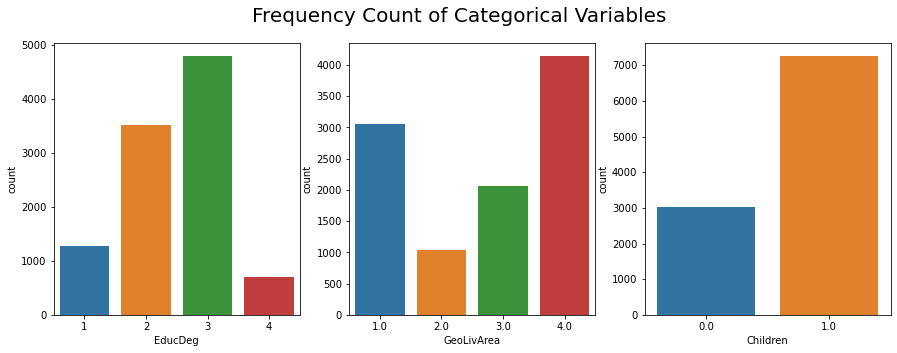

In [52]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Frequency Count of Categorical Variables', fontsize = 20)

sns.countplot(df['EducDeg'], ax=ax[0], order=['1','2','3','4'])
sns.countplot(df['GeoLivArea'], ax=ax[1])
sns.countplot(df['Children'], ax=ax[2])

fig.show()

In [53]:
num_features= df.select_dtypes('float64')
num_features.set_index('CustID', inplace=True)
num_features

FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                               
1.0            1985.0    2177.0      380.97        0.39     375.85   
2.0            1981.0     677.0     -131.13        1.12      77.46   
3.0            1991.0    2277.0      504.67        0.28     206.15   
4.0            1990.0    1099.0      -16.99        0.99     182.48   
5.0            1986.0    1763.0       35.23        0.90     338.62   
...               ...       ...         ...         ...        ...   
10292.0        1984.0    3188.0       -0.11        0.96     393.74   
10293.0        1977.0    2431.0     1405.60        0.00     133.58   
10294.0        1994.0    2918.0      524.10        0.21     403.63   
10295.0        1981.0    1971.0      250.05        0.65     188.59   
10296.0        1990.0    2815.0      463.75        0.27     414.08   

         PremHousehold  PremHealth  PremLife  PremWork  
CustID                                                  
1.0              79.45      146.36     47.01     16.89  
2.0             416.20      116.69    194.48    106.13  
3.0             224.50      124.58     86.35     99.02  
4.0              43.35      311.17     35.34     28.34  
5.0              47.80      182.59     18.78     41.45  
...                ...         ...       ...       ...  
10292.0          49.45      173.81      9.78     14.78  
10293.0        1035.75      143.25     12.89    105.13  
10294.0         132.80      142.25     12.67      4.89  
10295.0         211.15      198.37     63.90    112.91  
10296.0          94.45      141.25      6.89     12.89  

[10294 rows x 9 columns]

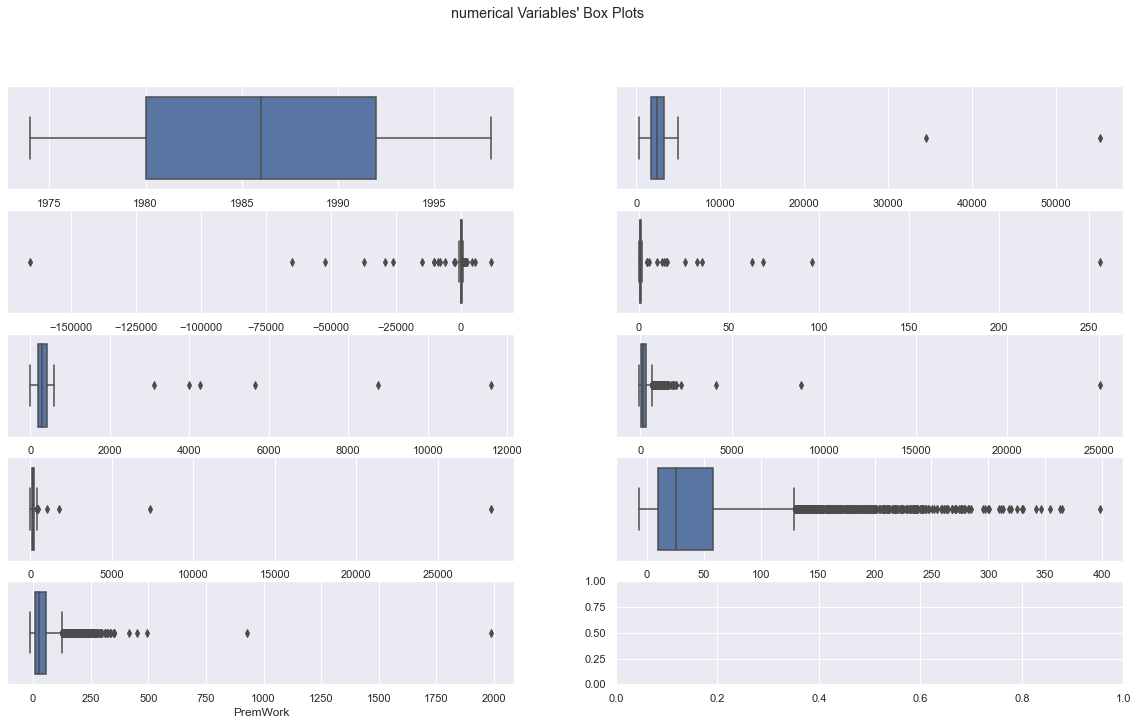

In [54]:
# All numerical Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(ceil(len(num_features.columns.to_list()) / 2), 2, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_features.columns.to_list()): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "numerical Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'num_variables_boxplots.png'), dpi=200)
plt.show()

% of observations considered outliers: 2%
Number of observations considered outliers: 198


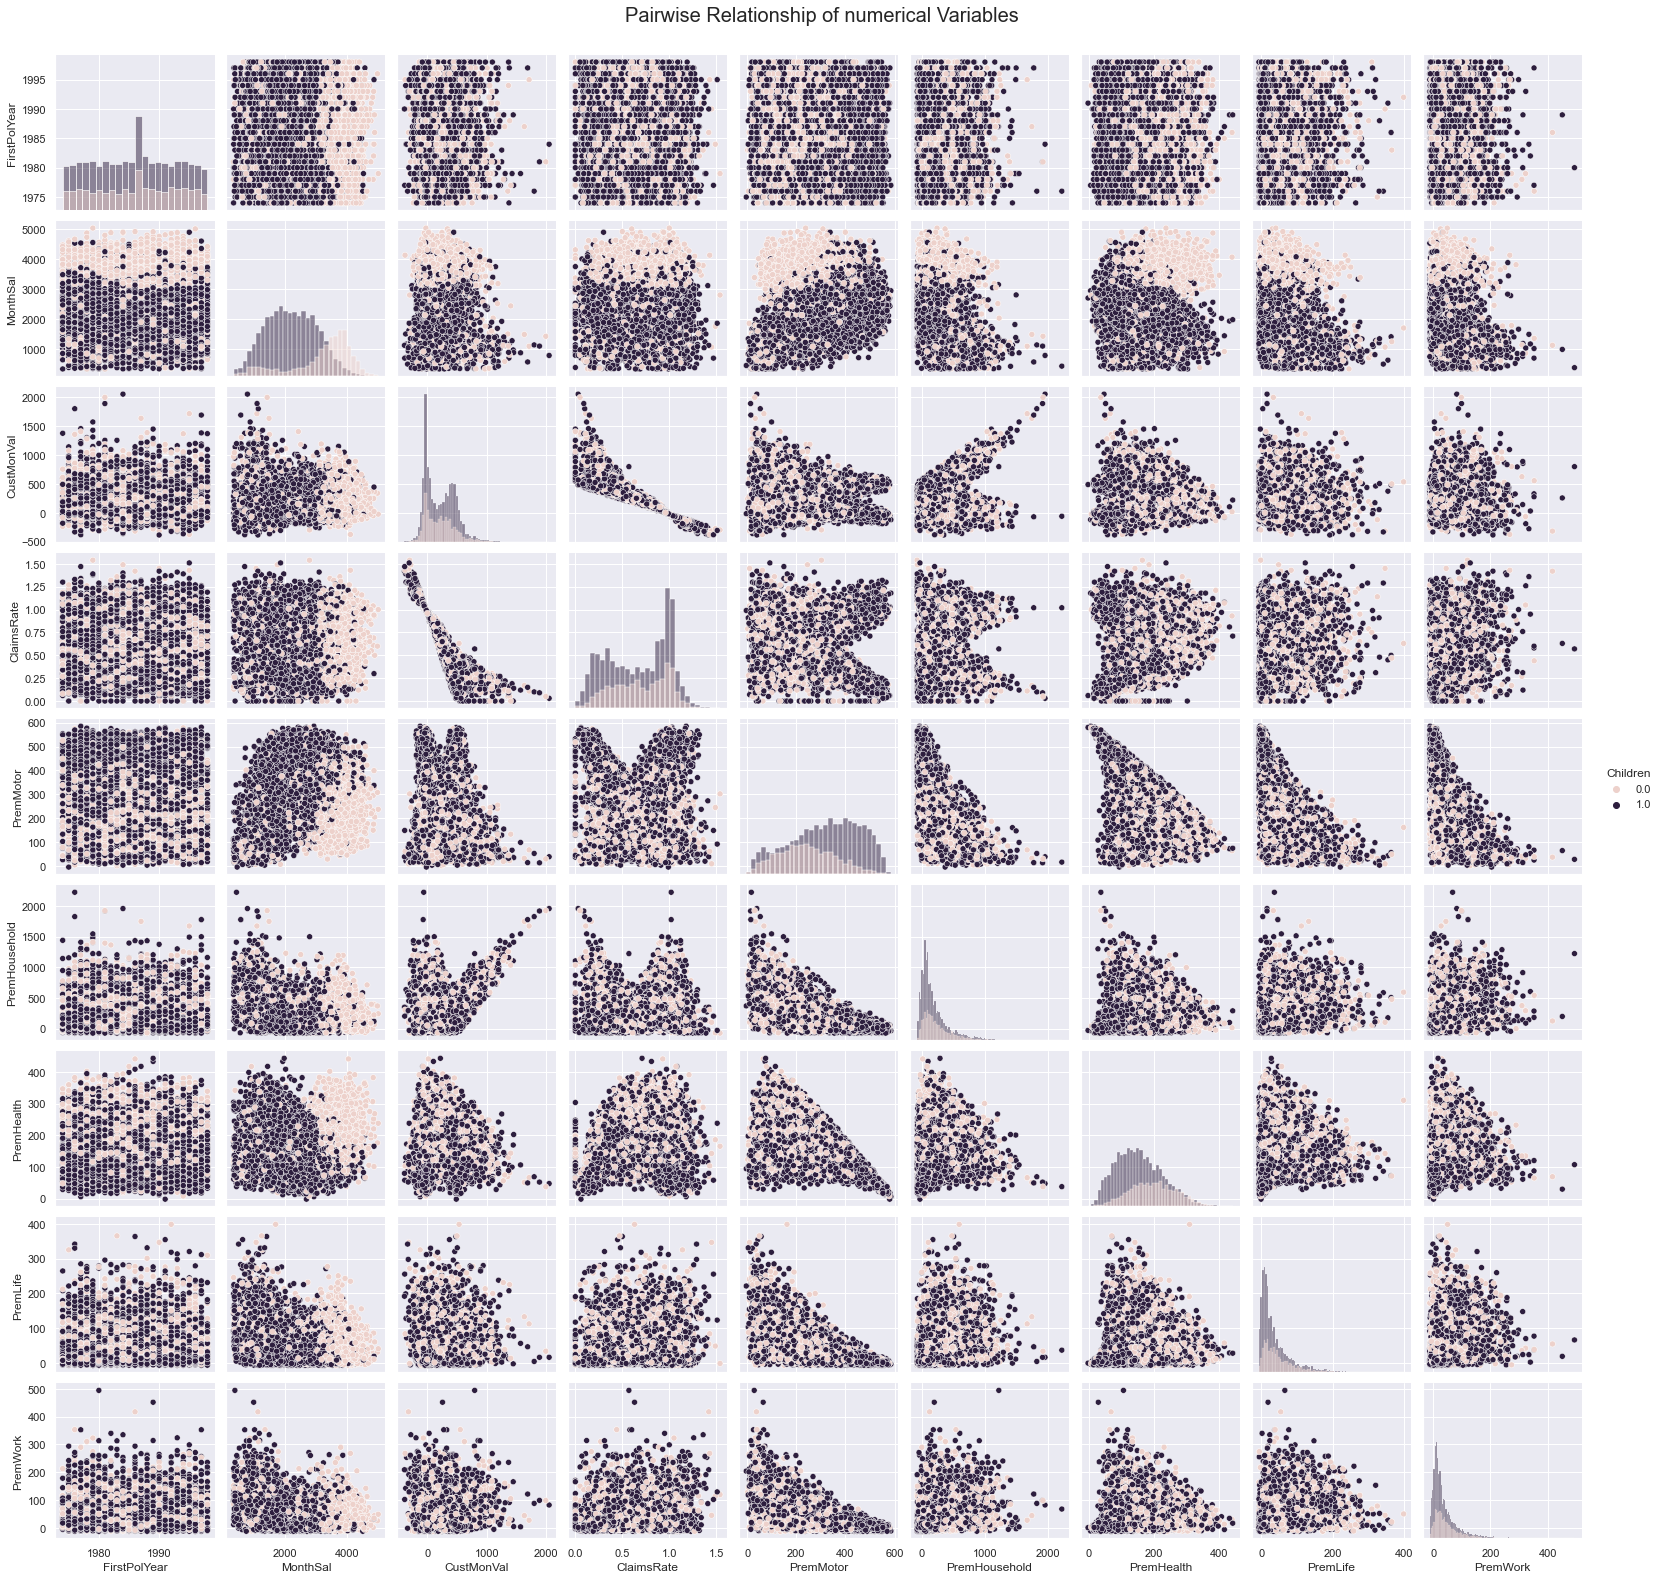

In [55]:
#  Arbitrary values set to rid of extreme outliers, filtered only for better vizualization this step
filters=(
    (df['FirstPolYear']!=53784) &
    (df['MonthSal']<20000) &
    (df['CustMonVal']>-400) &
    (df['ClaimsRate']<50) &
    (df['PremMotor']<2500) &
    (df['PremHousehold']<3000) &
    (df['PremHealth']<3000) &
    (df['PremWork']<500)
)

visualization_num_var = df[filters]
print("% of observations considered outliers: {}%".format(int(round(1-visualization_num_var.shape[0]/df.shape[0],2)*100)))
print("Number of observations considered outliers: {}".format(len(df) - len(df[filters])))

# Pairwise Relationship of numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(visualization_num_var[num_features.columns.to_list()+['Children']], diag_kind="hist",hue='Children') # new_df variable removed for now

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of numerical Variables", fontsize=20)

plt.show()

# 3. Data Preparation  <a class="anchor" id="3"></a>

## 3.1 Data Selection  <a class="anchor" id="3.1"></a>

We are tasked with a segmentation problem, without specific feature of interest communicated from the insurance company. Therefore feature selection can be done qualitatively, with some consideration of results found from the previous sections (e.g., multicollinearity)

we can mention Lucas's job as a industry insider's opinion?

## 3.2 Data Cleaning  <a class="anchor" id="3.2"></a>

### 3.2.1 Impossible Values

In [56]:
# we drop these two records for being impossible
df = df.loc[(df["FirstPolYear"] != 53784.0)]

### 3.2.2 Missing Values

In [57]:
df.isnull().sum()

CustID             0
FirstPolYear      30
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [58]:
premiums = ['PremLife','PremMotor','PremHousehold','PremHealth','PremWork']

# To store imputed CustID
tmp = df[df[premiums].isnull().any(axis=1)]
imp_prem_id = tmp['CustID']
len(imp_prem_id)

225

In [59]:
# As discussed in session 2.4, we treat nan values for premiums as zeros
df[premiums] = df[premiums].fillna(0)

In [60]:
df.isnull().sum()

CustID            0
FirstPolYear     30
EducDeg          17
MonthSal         36
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [61]:
# https://arxiv.org/ftp/arxiv/papers/1211/1211.1799.pdf#:~:text=The%20commonly%20used%20method%20for,of%20the%20attribute%20%5B5%5D.
# "The commonly used method for missing values imputation in categorical data is to substitute missing values of each attribute by the most common value of the attribute"
# i.e., mode
categorical = ['EducDeg','GeoLivArea','Children']

# To store imputed CustID
tmp = df[df[categorical].isnull().any(axis=1)]
imp_cat_id = tmp['CustID']
len(imp_prem_id)

225

In [62]:
# Impute categorical with mode
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [63]:
df.isnull().sum()

CustID            0
FirstPolYear     30
EducDeg           0
MonthSal         36
GeoLivArea        0
Children          0
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [64]:
# these are some clients that don't have any insurance (all prem- values being nan/0 values) and CustMonVal == -25 which we believe to be the acquisition value
# in that sense we can't make a cluster with this obs because would't be representative enought, so we decided to drop it
df = df.loc[~((df.PremLife==0)&
               (df.PremMotor==0)&
               (df.PremHousehold==0)&
               (df.PremHealth==0)&
               (df.PremWork==0)
             )
          ]

In [65]:
df['CustID'] = df['CustID'].astype(int)

In [66]:
df[['EducDeg','GeoLivArea','Children']] = df[['EducDeg','GeoLivArea','Children']].astype('object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10282 non-null  int32  
 1   FirstPolYear   10252 non-null  float64
 2   EducDeg        10282 non-null  object 
 3   MonthSal       10246 non-null  float64
 4   GeoLivArea     10282 non-null  object 
 5   Children       10282 non-null  object 
 6   CustMonVal     10282 non-null  float64
 7   ClaimsRate     10282 non-null  float64
 8   PremMotor      10282 non-null  float64
 9   PremHousehold  10282 non-null  float64
 10  PremHealth     10282 non-null  float64
 11  PremLife       10282 non-null  float64
 12  PremWork       10282 non-null  float64
dtypes: float64(9), int32(1), object(3)
memory usage: 1.1+ MB


In [68]:
df

CustID  FirstPolYear EducDeg  MonthSal GeoLivArea Children  CustMonVal  \
0           1        1985.0       2    2177.0        1.0      1.0      380.97   
1           2        1981.0       2     677.0        4.0      1.0     -131.13   
2           3        1991.0       1    2277.0        3.0      0.0      504.67   
3           4        1990.0       3    1099.0        4.0      1.0      -16.99   
4           5        1986.0       3    1763.0        4.0      1.0       35.23   
...       ...           ...     ...       ...        ...      ...         ...   
10291   10292        1984.0       4    3188.0        2.0      0.0       -0.11   
10292   10293        1977.0       1    2431.0        3.0      0.0     1405.60   
10293   10294        1994.0       3    2918.0        1.0      1.0      524.10   
10294   10295        1981.0       1    1971.0        2.0      1.0      250.05   
10295   10296        1990.0       4    2815.0        1.0      1.0      463.75   

       ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
0            0.39     375.85          79.45      146.36     47.01     16.89  
1            1.12      77.46         416.20      116.69    194.48    106.13  
2            0.28     206.15         224.50      124.58     86.35     99.02  
3            0.99     182.48          43.35      311.17     35.34     28.34  
4            0.90     338.62          47.80      182.59     18.78     41.45  
...           ...        ...            ...         ...       ...       ...  
10291        0.96     393.74          49.45      173.81      9.78     14.78  
10292        0.00     133.58        1035.75      143.25     12.89    105.13  
10293        0.21     403.63         132.80      142.25     12.67      4.89  
10294        0.65     188.59         211.15      198.37     63.90    112.91  
10295        0.27     414.08          94.45      141.25      6.89     12.89  

[10282 rows x 13 columns]

In [69]:
# There remains MonthSal and FirstPolYear (numerical) for missing values.
# We base the k (n_neighbors) value based on rule of thum: sqrt(n), rounded to an odd number = 101
math.sqrt(len(df))

101.40019723846694

In [70]:
imputer = KNNImputer(n_neighbors=101)

In [71]:
# Prepare numerical features to be imputed
num_df = df.drop(categorical, axis=1)
num_df = num_df.set_index('CustID')

# KNN imputer for numerical variables (reference code)
# Standardization is not suited for distance-based classifier such as KNN. Hence normalization is used. We use min-max for this purpose.
minmax = MinMaxScaler()
num_df_minmax = pd.DataFrame(minmax.fit_transform(num_df), columns = num_df.columns)
imputed = pd.DataFrame(imputer.fit_transform(num_df_minmax), columns = num_df_minmax.columns)

In [72]:
imputed

FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0          0.458333  0.033599    0.935260    0.001522   0.032731   
1          0.291667  0.006268    0.932376    0.004372   0.007027   
2          0.708333  0.035421    0.935957    0.001093   0.018113   
3          0.666667  0.013957    0.933019    0.003864   0.016074   
4          0.500000  0.026056    0.933313    0.003513   0.029524   
...             ...       ...         ...         ...        ...   
10277      0.416667  0.052021    0.933114    0.003747   0.034272   
10278      0.125000  0.038227    0.941031    0.000000   0.011861   
10279      0.833333  0.047101    0.936067    0.000820   0.035124   
10280      0.291667  0.029846    0.934523    0.002537   0.016600   
10281      0.666667  0.045224    0.935727    0.001054   0.036024   

       PremHousehold  PremHealth  PremLife  PremWork  
0           0.006148    0.005251  0.133259  0.014440  
1           0.019551    0.004202  0.497113  0.059044  
2           0.011921    0.004481  0.230323  0.055491  
3           0.004711    0.011080  0.104466  0.020163  
4           0.004888    0.006532  0.063607  0.026716  
...              ...         ...       ...       ...  
10277       0.004953    0.006222  0.041401  0.013385  
10278       0.044211    0.005141  0.049075  0.058545  
10279       0.008271    0.005106  0.048532  0.008442  
10280       0.011390    0.007091  0.174932  0.062433  
10281       0.006745    0.005070  0.034271  0.012441  

[10282 rows x 9 columns]

In [73]:
imputed.isnull().sum()

FirstPolYear     0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [74]:
imputed = minmax.inverse_transform(imputed)
imputed

array([[1985.  , 2177.  ,  380.97, ...,  146.36,   47.01,   16.89],
       [1981.  ,  677.  , -131.13, ...,  116.69,  194.48,  106.13],
       [1991.  , 2277.  ,  504.67, ...,  124.58,   86.35,   99.02],
       ...,
       [1994.  , 2918.  ,  524.1 , ...,  142.25,   12.67,    4.89],
       [1981.  , 1971.  ,  250.05, ...,  198.37,   63.9 ,  112.91],
       [1990.  , 2815.  ,  463.75, ...,  141.25,    6.89,   12.89]])

In [75]:
imputed = pd.DataFrame(imputed)
imputed.columns = num_df.columns
imputed

FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0            1985.0    2177.0      380.97        0.39     375.85   
1            1981.0     677.0     -131.13        1.12      77.46   
2            1991.0    2277.0      504.67        0.28     206.15   
3            1990.0    1099.0      -16.99        0.99     182.48   
4            1986.0    1763.0       35.23        0.90     338.62   
...             ...       ...         ...         ...        ...   
10277        1984.0    3188.0       -0.11        0.96     393.74   
10278        1977.0    2431.0     1405.60        0.00     133.58   
10279        1994.0    2918.0      524.10        0.21     403.63   
10280        1981.0    1971.0      250.05        0.65     188.59   
10281        1990.0    2815.0      463.75        0.27     414.08   

       PremHousehold  PremHealth  PremLife  PremWork  
0              79.45      146.36     47.01     16.89  
1             416.20      116.69    194.48    106.13  
2             224.50      124.58     86.35     99.02  
3              43.35      311.17     35.34     28.34  
4              47.80      182.59     18.78     41.45  
...              ...         ...       ...       ...  
10277          49.45      173.81      9.78     14.78  
10278        1035.75      143.25     12.89    105.13  
10279         132.80      142.25     12.67      4.89  
10280         211.15      198.37     63.90    112.91  
10281          94.45      141.25      6.89     12.89  

[10282 rows x 9 columns]

In [76]:
# Not necessary, but add the CustID for later usaged.
imputed.insert(0, 'CustID',0)
imputed['CustID'] = df.reset_index()['CustID']

In [77]:
imputed

CustID  FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0           1        1985.0    2177.0      380.97        0.39     375.85   
1           2        1981.0     677.0     -131.13        1.12      77.46   
2           3        1991.0    2277.0      504.67        0.28     206.15   
3           4        1990.0    1099.0      -16.99        0.99     182.48   
4           5        1986.0    1763.0       35.23        0.90     338.62   
...       ...           ...       ...         ...         ...        ...   
10277   10292        1984.0    3188.0       -0.11        0.96     393.74   
10278   10293        1977.0    2431.0     1405.60        0.00     133.58   
10279   10294        1994.0    2918.0      524.10        0.21     403.63   
10280   10295        1981.0    1971.0      250.05        0.65     188.59   
10281   10296        1990.0    2815.0      463.75        0.27     414.08   

       PremHousehold  PremHealth  PremLife  PremWork  
0              79.45      146.36     47.01     16.89  
1             416.20      116.69    194.48    106.13  
2             224.50      124.58     86.35     99.02  
3              43.35      311.17     35.34     28.34  
4              47.80      182.59     18.78     41.45  
...              ...         ...       ...       ...  
10277          49.45      173.81      9.78     14.78  
10278        1035.75      143.25     12.89    105.13  
10279         132.80      142.25     12.67      4.89  
10280         211.15      198.37     63.90    112.91  
10281          94.45      141.25      6.89     12.89  

[10282 rows x 10 columns]

In [78]:
backup = df.copy()

In [79]:
backup.reset_index(inplace = True)

In [80]:
backup[['FirstPolYear','MonthSal']] = imputed[['FirstPolYear','MonthSal']]

In [81]:
backup.isnull().sum()

index            0
CustID           0
FirstPolYear     0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [82]:
backup.drop(columns= 'index', inplace = True)
backup

CustID  FirstPolYear EducDeg  MonthSal GeoLivArea Children  CustMonVal  \
0           1        1985.0       2    2177.0        1.0      1.0      380.97   
1           2        1981.0       2     677.0        4.0      1.0     -131.13   
2           3        1991.0       1    2277.0        3.0      0.0      504.67   
3           4        1990.0       3    1099.0        4.0      1.0      -16.99   
4           5        1986.0       3    1763.0        4.0      1.0       35.23   
...       ...           ...     ...       ...        ...      ...         ...   
10277   10292        1984.0       4    3188.0        2.0      0.0       -0.11   
10278   10293        1977.0       1    2431.0        3.0      0.0     1405.60   
10279   10294        1994.0       3    2918.0        1.0      1.0      524.10   
10280   10295        1981.0       1    1971.0        2.0      1.0      250.05   
10281   10296        1990.0       4    2815.0        1.0      1.0      463.75   

       ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
0            0.39     375.85          79.45      146.36     47.01     16.89  
1            1.12      77.46         416.20      116.69    194.48    106.13  
2            0.28     206.15         224.50      124.58     86.35     99.02  
3            0.99     182.48          43.35      311.17     35.34     28.34  
4            0.90     338.62          47.80      182.59     18.78     41.45  
...           ...        ...            ...         ...       ...       ...  
10277        0.96     393.74          49.45      173.81      9.78     14.78  
10278        0.00     133.58        1035.75      143.25     12.89    105.13  
10279        0.21     403.63         132.80      142.25     12.67      4.89  
10280        0.65     188.59         211.15      198.37     63.90    112.91  
10281        0.27     414.08          94.45      141.25      6.89     12.89  

[10282 rows x 13 columns]

In [83]:
df = backup.copy()

### 3.2.3 Data Normalization for outlier detection

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10282 non-null  int32  
 1   FirstPolYear   10282 non-null  float64
 2   EducDeg        10282 non-null  object 
 3   MonthSal       10282 non-null  float64
 4   GeoLivArea     10282 non-null  object 
 5   Children       10282 non-null  object 
 6   CustMonVal     10282 non-null  float64
 7   ClaimsRate     10282 non-null  float64
 8   PremMotor      10282 non-null  float64
 9   PremHousehold  10282 non-null  float64
 10  PremHealth     10282 non-null  float64
 11  PremLife       10282 non-null  float64
 12  PremWork       10282 non-null  float64
dtypes: float64(9), int32(1), object(3)
memory usage: 1004.2+ KB


In [85]:
minmax = MinMaxScaler()
robust = RobustScaler()
yeojohnson = PowerTransformer('yeo-johnson')

num_features= df.select_dtypes('float64')

# transform data
scaled_minmax = minmax.fit_transform(num_features)
scaled_robust = robust.fit_transform(num_features)
scaled_yeojohn = yeojohnson.fit_transform(num_features)

# Concatenate the results to be visualized
normal_res = np.concatenate((scaled_minmax, scaled_robust, scaled_yeojohn), axis=1)
labels = list(map(lambda x: "minmax_" + x, num_features.columns.to_list())) + list(map(lambda x: "robust_" + x, num_features.columns.to_list())) + list(map(lambda x: "yeojohn_" + x, num_features.columns.to_list()))
normal_res_df = pd.DataFrame(normal_res, num_features.index, labels)
normal_res_df.head()

minmax_FirstPolYear  minmax_MonthSal  minmax_CustMonVal  minmax_ClaimsRate  \
0             0.458333         0.033599           0.935260           0.001522   
1             0.291667         0.006268           0.932376           0.004372   
2             0.708333         0.035421           0.935957           0.001093   
3             0.666667         0.013957           0.933019           0.003864   
4             0.500000         0.026056           0.933313           0.003513   

   minmax_PremMotor  minmax_PremHousehold  minmax_PremHealth  minmax_PremLife  \
0          0.032731              0.006148           0.005251         0.133259   
1          0.007027              0.019551           0.004202         0.497113   
2          0.018113              0.011921           0.004481         0.230323   
3          0.016074              0.004711           0.011080         0.104466   
4          0.029524              0.004888           0.006532         0.063607   

   minmax_PremWork  robust_FirstPolYear  ...  robust_PremWork  \
0         0.014440            -0.083333  ...        -0.188437   
1         0.059044            -0.416667  ...         1.751141   
2         0.055491             0.416667  ...         1.596609   
3         0.020163             0.333333  ...         0.060422   
4         0.026716             0.000000  ...         0.345360   

   yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
0             -0.159540         -0.208262            0.373110   
1             -0.762374         -2.164826           -0.673247   
2              0.752853         -0.108828            0.739361   
3              0.600107         -1.483907           -0.601578   
4             -0.008155         -0.647551           -0.523969   

   yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
0           -0.802584           0.579275              -0.323080   
1            1.152632          -1.657409               0.849026   
2           -1.239652          -0.472750               0.240085   
3            0.887313          -0.652151              -0.498403   
4            0.687413           0.374418              -0.475195   

   yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
0           -0.098913          0.395210         -0.340394  
1           -0.501714          2.376498          1.339238  
2           -0.388233          1.072008          1.236246  
3            1.460896          0.143842         -0.039137  
4            0.322091         -0.295992          0.251891  

[5 rows x 27 columns]

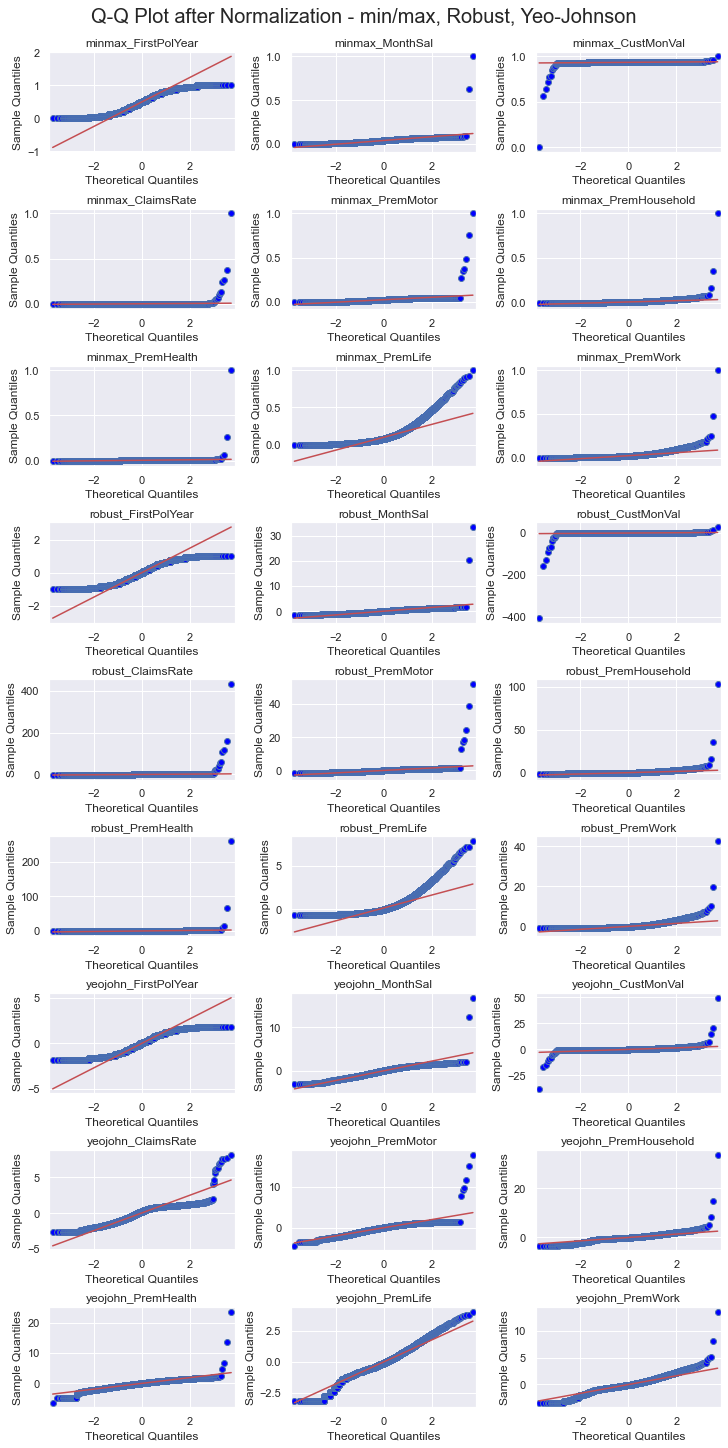

In [86]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(9,3, constrained_layout = True, figsize = (10,20))

fig.suptitle("Q-Q Plot after Normalization - min/max, Robust, Yeo-Johnson", fontsize = 20)
for c, ax in zip(normal_res_df.columns, axes.flatten()):
    x = normal_res_df.loc[:,c]
    sm.qqplot(x, line = "q", ax = ax)
    ax.set_title(c)

plt.show()

In [87]:
# We will only use yeo-johnson as the results most consistly produced normal distribution spread (esepcially prem life)
scaled_yj_df = normal_res_df.loc[:,[i for i in normal_res_df.columns.to_list() if "yeojohn" in i]]
scaled_yj_df.head()

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
0             -0.159540         -0.208262            0.373110   
1             -0.762374         -2.164826           -0.673247   
2              0.752853         -0.108828            0.739361   
3              0.600107         -1.483907           -0.601578   
4             -0.008155         -0.647551           -0.523969   

   yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
0           -0.802584           0.579275              -0.323080   
1            1.152632          -1.657409               0.849026   
2           -1.239652          -0.472750               0.240085   
3            0.887313          -0.652151              -0.498403   
4            0.687413           0.374418              -0.475195   

   yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
0           -0.098913          0.395210         -0.340394  
1           -0.501714          2.376498          1.339238  
2           -0.388233          1.072008          1.236246  
3            1.460896          0.143842         -0.039137  
4            0.322091         -0.295992          0.251891

In [88]:
scaled_yj_df.columns

Index(['yeojohn_FirstPolYear', 'yeojohn_MonthSal', 'yeojohn_CustMonVal',
       'yeojohn_ClaimsRate', 'yeojohn_PremMotor', 'yeojohn_PremHousehold',
       'yeojohn_PremHealth', 'yeojohn_PremLife', 'yeojohn_PremWork'],
      dtype='object')

In [89]:
scaled_yj_df.insert(0, 'CustID',0)
scaled_yj_df['CustID'] = df['CustID']

In [90]:
scaled_yj_df.set_index('CustID',inplace=True)

### 3.2.4 Outliers Treatment

### Univariate
#### IQR method

In [91]:
#outlier removal using IQR method
q25 = scaled_yj_df.quantile(.25)
q75 = scaled_yj_df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
num_var = scaled_yj_df.columns.to_list()
for numerical in num_var:
    llim = lower_lim[numerical]
    ulim = upper_lim[numerical]
    filters.append(scaled_yj_df[numerical].between(llim, ulim, inclusive=True))

df_iqr = scaled_yj_df[np.all(filters, 0)]
print('Number of outliers:', (scaled_yj_df.shape[0] - df_iqr.shape[0]))
print('Percentage of data kept after removing outliers:', (np.round(df_iqr.shape[0] / scaled_yj_df.shape[0], 3))*100)
#df = df.loc[df_iqr.index]

Number of outliers: 1575
Percentage of data kept after removing outliers: 84.7


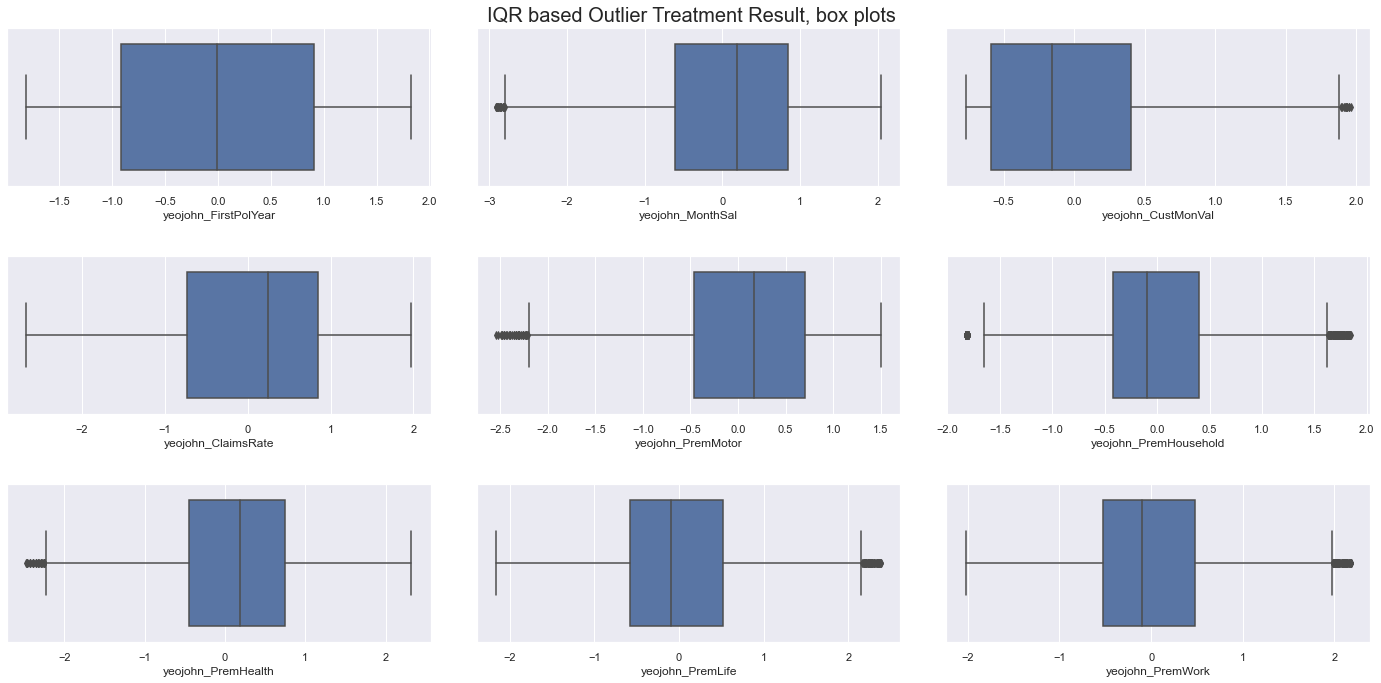

In [92]:
# All numerical Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), df_iqr.columns.to_list()): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_iqr[feat], ax=ax)
    
# Layout
plt.tight_layout(pad=3)
plt.suptitle('IQR based Outlier Treatment Result, box plots', fontsize = 20)
plt.show()

**z-scores**

In [93]:
z_scores = stats.zscore(scaled_yj_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_zscore = scaled_yj_df[filtered_entries]
print('Number of outliers:', (scaled_yj_df.shape[0] - df_zscore.shape[0]))
print('Percentage of data kept after removing outliers:', np.round(df_zscore.shape[0] / scaled_yj_df.shape[0], 3)*100)

Number of outliers: 431
Percentage of data kept after removing outliers: 95.8


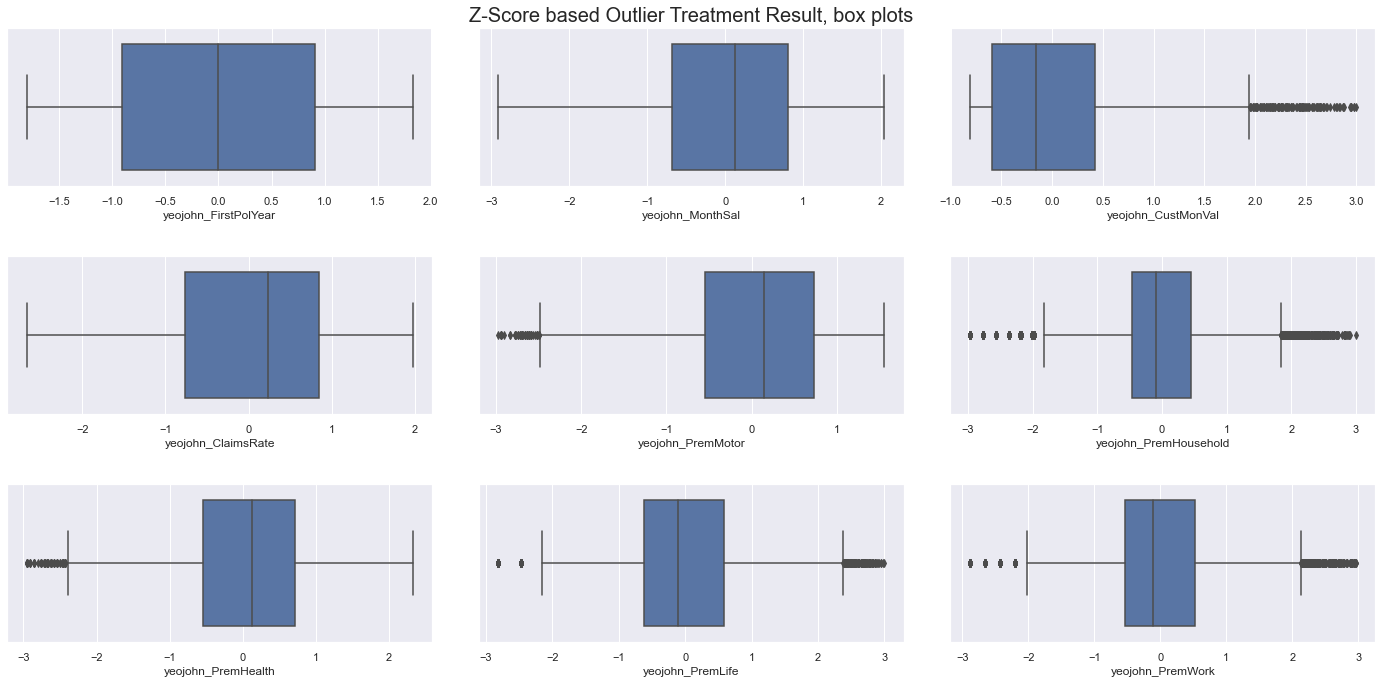

In [94]:
# All numerical Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), df_zscore.columns.to_list()): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_zscore[feat], ax=ax)
    
# Layout
plt.tight_layout(pad=3)
plt.suptitle('Z-Score based Outlier Treatment Result, box plots', fontsize = 20)
plt.show()

**Median Absolute Deviation**

Theoretical support:
https://www.sciencedirect.com/science/article/abs/pii/S0022103113000668

In [95]:
# https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

def mad_method(df, variable_name, thresh = 2.5): # using conservative threshold (default = 3, 'poorly conservative' = 2)
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = thresh
    outlier = []
    index = 0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [96]:
# Be mindful FirstPolYear obviously shouldn't have any "outlier"
mad_out_list = []
# List to check customers that appear more than once
mad_out_list2 = []
for c in scaled_yj_df.columns:
    out_idx = mad_method(scaled_yj_df, c)
    print(f'-----{c}-----')
    print('Number of outliers:', len(out_idx))
    print('The index of outliers:', out_idx)
    for i in out_idx:
        mad_out_list.append(i) if i not in mad_out_list else mad_out_list
        mad_out_list2.append(i)
print('------------------------------------------------------------------')
print('Total number of outliers:', len(mad_out_list))

-----yeojohn_FirstPolYear-----
Number of outliers: 0
The index of outliers: []
-----yeojohn_MonthSal-----
Number of outliers: 2
The index of outliers: [5876, 8251]
-----yeojohn_CustMonVal-----
Number of outliers: 26
The index of outliers: [301, 628, 851, 1857, 2041, 2321, 2528, 3659, 4367, 4742, 5078, 5287, 6692, 6733, 6849, 7076, 7157, 7951, 8356, 8656, 9224, 9544, 9549, 9761, 9783, 10278]
-----yeojohn_ClaimsRate-----
Number of outliers: 15
The index of outliers: [51, 112, 135, 171, 655, 675, 707, 758, 793, 916, 950, 981, 1024, 7952, 9635]
-----yeojohn_PremMotor-----
Number of outliers: 6
The index of outliers: [5122, 5205, 5287, 6692, 7076, 7894]
-----yeojohn_PremHousehold-----
Number of outliers: 18
The index of outliers: [1068, 2041, 2321, 2528, 3080, 3534, 3689, 4367, 4742, 6336, 6541, 6733, 6826, 8356, 8415, 8656, 8855, 9224]
-----yeojohn_PremHealth-----
Number of outliers: 4
The index of outliers: [5205, 5287, 7951, 9138]
-----yeojohn_PremLife-----
Number of outliers: 14
The ind

In [97]:
mad_out_df = scaled_yj_df.iloc[mad_out_list]
mad_out_df

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
CustID                                                               
5883                1.366577         16.814695           -0.326453   
8262               -0.762374         12.442545            1.058845   
302                -1.509848         -0.958750            3.548821   
629                 0.447633         -1.679460            3.871552   
852                -1.806958         -2.131876            3.617104   
...                      ...               ...                 ...   
7399               -0.461498         -1.079308           -0.545935   
7719               -1.211665         -1.436951            1.105890   
8167               -0.912407         -1.877859            1.951003   
8876                1.059167         -1.584509           -0.706232   
9955               -1.806958         -2.002579           -0.818786   

        yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
CustID                                                                 
5883              0.422293           0.037597              -0.041580   
8262             -1.239652          -1.928076               0.676719   
302              -2.373320          -2.173939               2.574228   
629              -2.671813          -2.239780               2.608710   
852              -2.316243          -2.453716               2.697574   
...                    ...                ...                    ...   
7399              0.755643          -2.045877              -0.120266   
7719             -1.282261          -2.173939               0.722511   
8167             -1.114849          -2.739023               2.158120   
8876              1.411638          -2.077268              -0.285778   
9955              1.876744          -2.560852              -0.082718   

        yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
CustID                                                          
5883             -0.305234          1.043487          0.724736  
8262              0.455491          1.456300          2.059498  
302              -1.320571          1.286833          1.924454  
629               0.170725         -1.875229          2.115717  
852              -0.943827          2.503452         -0.135090  
...                    ...               ...               ...  
7399             -0.331087          1.085333          3.362612  
7719             -0.252829          0.141296          3.626545  
8167             -1.513841         -0.154767          3.654472  
8876             -0.556321          0.806927          3.750930  
9955             -2.504196          2.204582          3.993592  

[91 rows x 9 columns]

In [98]:
# Reference. If there is at least one outlier identified, at least the min or the max value should be there in the list of outliers for the feature.
scaled_yj_df.describe().loc[['min','max']]

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
min             -1.806958         -2.914590          -38.085543   
max              1.829754         16.814695           49.621239   

     yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
min           -2.671813          -4.323278              -3.401896   
max            8.176911          17.872138              33.739546   

     yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
min           -6.327575         -3.183343         -3.391983  
max           23.616976          4.074478         13.515317

In [99]:
# Check a few
# FirstPolYear value
scaled_yj_df.iloc[5876]

yeojohn_FirstPolYear      1.366577
yeojohn_MonthSal         16.814695
yeojohn_CustMonVal       -0.326453
yeojohn_ClaimsRate        0.422293
yeojohn_PremMotor         0.037597
yeojohn_PremHousehold    -0.041580
yeojohn_PremHealth       -0.305234
yeojohn_PremLife          1.043487
yeojohn_PremWork          0.724736
Name: 5883, dtype: float64

In [100]:
# Check a few
# Motor
scaled_yj_df.iloc[[5122, 5205, 5287, 6692, 7076, 7894]]

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
CustID                                                               
5129                1.520694          1.163079            0.623857   
5212               -0.762374          1.437973           -0.307103   
5294                0.447633          1.010218           49.621239   
6702                1.366577          0.505799           15.127880   
7086                0.905874          0.067438           20.535727   
7905               -1.806958         -0.033798           -0.622524   

        yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
CustID                                                                 
5129              0.687413           9.353004               1.400142   
5212              0.887313          15.174596              -0.225628   
5294             -2.149884          17.872138              -0.469544   
6702             -2.490031           9.761414              -0.303082   
7086             -2.610294          11.652040              -1.480552   
7905              0.929849           7.880539              -0.572079   

        yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
CustID                                                          
5129             -0.214574          1.558108          0.031421  
5212              6.739292          1.957558          1.674174  
5294              4.845024          1.312965          3.496571  
6702             -0.678025         -0.972055         -0.811805  
7086             -1.808949         -1.054296         -0.920135  
7905             -1.557926         -0.495770         -0.597208

In [101]:
# mad_out_list is the index i.e., the order from the top. We excluded items, so iloc won't match the actual values of CustID.
# Hence, this fix.
mad_CustID = mad_out_df.index.tolist()
mad_CustID

[5883,
 8262,
 302,
 629,
 852,
 1860,
 2044,
 2324,
 2531,
 3663,
 4374,
 4749,
 5085,
 5294,
 6702,
 6743,
 6859,
 7086,
 7167,
 7962,
 8367,
 8668,
 9236,
 9558,
 9563,
 9775,
 9798,
 10293,
 52,
 113,
 136,
 172,
 656,
 676,
 708,
 759,
 794,
 918,
 952,
 983,
 1026,
 7963,
 9649,
 5129,
 5212,
 7905,
 1070,
 3083,
 3538,
 3693,
 6344,
 6550,
 6836,
 8426,
 8867,
 9150,
 1302,
 1775,
 1870,
 2372,
 2423,
 3162,
 3275,
 3436,
 3485,
 5432,
 6087,
 6756,
 7308,
 9184,
 150,
 541,
 1746,
 1776,
 2811,
 2894,
 3050,
 3314,
 3845,
 4714,
 4974,
 5813,
 5942,
 6025,
 6451,
 6957,
 7399,
 7719,
 8167,
 8876,
 9955]

In [102]:
df_mad = scaled_yj_df[~scaled_yj_df.index.isin(mad_CustID)]
df_mad

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
CustID                                                               
1                  -0.159540         -0.208262            0.373110   
2                  -0.762374         -2.164826           -0.673247   
3                   0.752853         -0.108828            0.739361   
4                   0.600107         -1.483907           -0.601578   
5                  -0.008155         -0.647551           -0.523969   
...                      ...               ...                 ...   
10291               1.212735         -2.260731           -0.190707   
10292              -0.310654          0.708798           -0.586937   
10294               1.212735          0.480800            0.798227   
10295              -0.762374         -0.420851            0.004961   
10296               0.600107          0.390951            0.616516   

        yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
CustID                                                                 
1                -0.802584           0.579275              -0.323080   
2                 1.152632          -1.657409               0.849026   
3                -1.239652          -0.472750               0.240085   
4                 0.887313          -0.652151              -0.498403   
5                 0.687413           0.374418              -0.475195   
...                    ...                ...                    ...   
10291             0.569922          -3.005558               2.075990   
10292             0.822256           0.673912              -0.466731   
10294            -1.549238           0.725259              -0.098130   
10295             0.046090          -0.604725               0.193468   
10296            -1.282261           0.778798              -0.256718   

        yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
CustID                                                          
1                -0.098913          0.395210         -0.340394  
2                -0.501714          2.376498          1.339238  
3                -0.388233          1.072008          1.236246  
4                 1.460896          0.143842         -0.039137  
5                 0.322091         -0.295992          0.251891  
...                    ...               ...               ...  
10291            -0.709876          1.446051          2.523619  
10292             0.225819         -0.618504         -0.403624  
10294            -0.151100         -0.503975         -0.764526  
10295             0.487310          0.710438          1.434932  
10296            -0.163955         -0.749479         -0.463201  

[10191 rows x 9 columns]

In [103]:
# Checks to show the customer was excluded.
df_mad.loc[5882:5884]

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
CustID                                                               
5882                0.600107         -0.452755            0.702121   
5884                1.059167          0.625567           -0.624697   

        yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
CustID                                                                 
5882             -1.413257           0.451561              -0.158538   
5884              0.992444           0.412576              -1.319683   

        yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
CustID                                                          
5882              0.078147         -2.816629          0.481571  
5884              0.669256         -0.744098         -0.369966

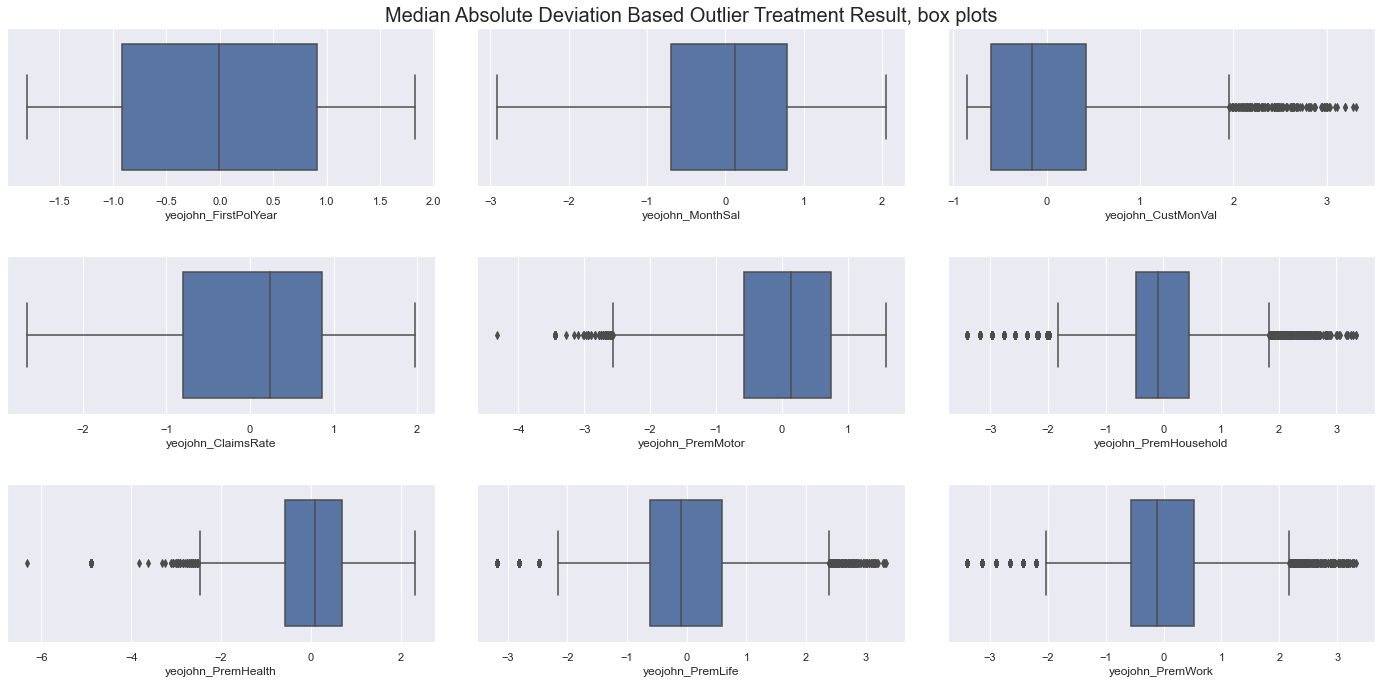

In [104]:
# All numerical Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), df_mad.columns.to_list()): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_mad[feat], ax=ax)
    
# Layout
plt.tight_layout(pad=3)
plt.suptitle('Median Absolute Deviation Based Outlier Treatment Result, box plots', fontsize = 20)
plt.show()

- We decide on median absolute deviation, move on to check multivariate 

### Multivariate
#### DBSCAN
How to choose the parameter for DBSCAN:
- Min points: If the data has more than 2 dimensions, choose MinPts = 2*dim,
where dim= the dimensions of your data set (Sander et al., 1998).
-Calculate the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [105]:
math.sqrt(len(df_mad))

100.9504829111778

In [106]:
#Calculate the average distance between each point in the data set and its 20 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=101)
neighbors_fit = neighbors.fit(df_mad)
distances, indices = neighbors_fit.kneighbors(df_mad)

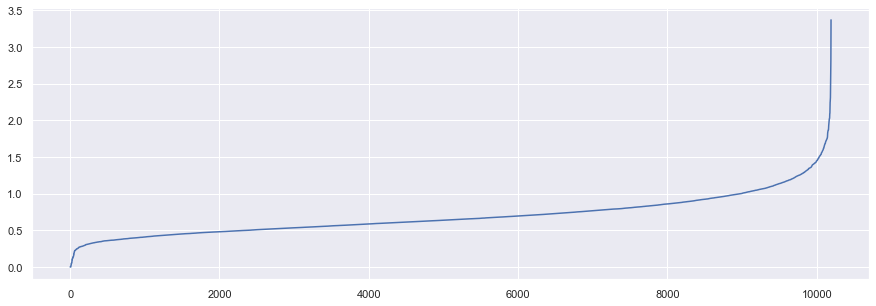

In [107]:
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#the elbow values (distance on the y axis gives us the best value for eps)

In [108]:
model = DBSCAN(eps = 2, min_samples = 18).fit(df_mad)

#converting the array into dataframe to group by labels and check the counts

labels = model.labels_
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

#-1 label corresponds to the outliers

 0    10112
-1       79
Name: cluster, dtype: int64

#### Connectivity Outlier Factor (COF)

In [109]:
cof = COF()
cof.fit(df_mad)
#Using predict method for identifying outliers
predict_cof = cof.predict(df_mad)
#let's count the total number of outliers
np.sum(predict_cof)

1019

In [110]:
# Malhalanobis
# https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3
# https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

#Mahalonibis Distance
def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [111]:
outliers_mahal, md = mahalanobis_method(df_mad)
len(outliers_mahal)

308

In [112]:
outliers_mahal

[135,
 179,
 252,
 260,
 276,
 361,
 380,
 386,
 388,
 469,
 482,
 506,
 510,
 554,
 641,
 650,
 652,
 680,
 688,
 706,
 734,
 751,
 758,
 829,
 844,
 850,
 855,
 861,
 877,
 885,
 893,
 920,
 942,
 1077,
 1123,
 1139,
 1167,
 1173,
 1184,
 1308,
 1311,
 1332,
 1337,
 1340,
 1346,
 1448,
 1449,
 1482,
 1494,
 1539,
 1568,
 1591,
 1685,
 1769,
 1770,
 1791,
 1884,
 1885,
 1910,
 1934,
 1974,
 1978,
 2042,
 2053,
 2089,
 2120,
 2132,
 2138,
 2151,
 2190,
 2197,
 2218,
 2361,
 2427,
 2443,
 2470,
 2490,
 2516,
 2543,
 2548,
 2565,
 2659,
 2735,
 2752,
 2753,
 2765,
 2831,
 2849,
 2854,
 2894,
 2916,
 2922,
 2924,
 2948,
 2954,
 2991,
 3001,
 3033,
 3049,
 3056,
 3057,
 3104,
 3142,
 3167,
 3189,
 3240,
 3260,
 3290,
 3324,
 3335,
 3336,
 3347,
 3382,
 3422,
 3430,
 3450,
 3462,
 3500,
 3518,
 3524,
 3538,
 3603,
 3631,
 3636,
 3711,
 3750,
 3753,
 3756,
 3775,
 3808,
 3841,
 3853,
 3969,
 3993,
 4083,
 4118,
 4174,
 4189,
 4214,
 4268,
 4329,
 4348,
 4366,
 4415,
 4431,
 4465,
 4493,
 451

In [113]:
df_mahal = df_mad[~df_mad.index.isin(outliers_mahal)]
df_mahal

yeojohn_FirstPolYear  yeojohn_MonthSal  yeojohn_CustMonVal  \
CustID                                                               
1                  -0.159540         -0.208262            0.373110   
2                  -0.762374         -2.164826           -0.673247   
3                   0.752853         -0.108828            0.739361   
4                   0.600107         -1.483907           -0.601578   
5                  -0.008155         -0.647551           -0.523969   
...                      ...               ...                 ...   
10291               1.212735         -2.260731           -0.190707   
10292              -0.310654          0.708798           -0.586937   
10294               1.212735          0.480800            0.798227   
10295              -0.762374         -0.420851            0.004961   
10296               0.600107          0.390951            0.616516   

        yeojohn_ClaimsRate  yeojohn_PremMotor  yeojohn_PremHousehold  \
CustID                                                                 
1                -0.802584           0.579275              -0.323080   
2                 1.152632          -1.657409               0.849026   
3                -1.239652          -0.472750               0.240085   
4                 0.887313          -0.652151              -0.498403   
5                 0.687413           0.374418              -0.475195   
...                    ...                ...                    ...   
10291             0.569922          -3.005558               2.075990   
10292             0.822256           0.673912              -0.466731   
10294            -1.549238           0.725259              -0.098130   
10295             0.046090          -0.604725               0.193468   
10296            -1.282261           0.778798              -0.256718   

        yeojohn_PremHealth  yeojohn_PremLife  yeojohn_PremWork  
CustID                                                          
1                -0.098913          0.395210         -0.340394  
2                -0.501714          2.376498          1.339238  
3                -0.388233          1.072008          1.236246  
4                 1.460896          0.143842         -0.039137  
5                 0.322091         -0.295992          0.251891  
...                    ...               ...               ...  
10291            -0.709876          1.446051          2.523619  
10292             0.225819         -0.618504         -0.403624  
10294            -0.151100         -0.503975         -0.764526  
10295             0.487310          0.710438          1.434932  
10296            -0.163955         -0.749479         -0.463201  

[9886 rows x 9 columns]

In [114]:
# The ratio of the data remaining after data cleaning
len(df_mahal) / orglen

0.9601787101787101

In [115]:
norm_cleaned_data_CustID = df_mahal.index.tolist()
cleaned_data = df[df.CustID.isin(norm_cleaned_data_CustID)]

In [116]:
cleaned_data.set_index('CustID',inplace=True)
cleaned_data

FirstPolYear EducDeg  MonthSal GeoLivArea Children  CustMonVal  \
CustID                                                                   
1             1985.0       2    2177.0        1.0      1.0      380.97   
2             1981.0       2     677.0        4.0      1.0     -131.13   
3             1991.0       1    2277.0        3.0      0.0      504.67   
4             1990.0       3    1099.0        4.0      1.0      -16.99   
5             1986.0       3    1763.0        4.0      1.0       35.23   
...              ...     ...       ...        ...      ...         ...   
10291         1994.0       1     626.0        3.0      1.0      176.26   
10292         1984.0       4    3188.0        2.0      0.0       -0.11   
10294         1994.0       3    2918.0        1.0      1.0      524.10   
10295         1981.0       1    1971.0        2.0      1.0      250.05   
10296         1990.0       4    2815.0        1.0      1.0      463.75   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
CustID                                                                        
1             0.39     375.85          79.45      146.36     47.01     16.89  
2             1.12      77.46         416.20      116.69    194.48    106.13  
3             0.28     206.15         224.50      124.58     86.35     99.02  
4             0.99     182.48          43.35      311.17     35.34     28.34  
5             0.90     338.62          47.80      182.59     18.78     41.45  
...            ...        ...            ...         ...       ...       ...  
10291         0.85       6.89         878.50      103.13    113.02    201.26  
10292         0.96     393.74          49.45      173.81      9.78     14.78  
10294         0.21     403.63         132.80      142.25     12.67      4.89  
10295         0.65     188.59         211.15      198.37     63.90    112.91  
10296         0.27     414.08          94.45      141.25      6.89     12.89  

[9886 rows x 12 columns]

In [117]:
# Final data was based on Median Absolute Deviation (univariate) + Mahalanobis (Multivariate)

## 3.3 Data Engineering  <a class="anchor" id="3.3"></a>

In [118]:
df = cleaned_data.copy()

In [119]:
# First thing we noticed was the discrepancy among the timeframes of the features.
# 1. Salary is monthly based
# 2. CustMonVal is lifetime based
# 3. Premiums are yearly based
# Since most of the variables (premiums) are yearly based, we turn the other two variables to be yearly.

# Salary
df['MonthSal'] = df['MonthSal']*12

# CustMonVal
# First find years as customer
df['YearsAsCust'] = 2016 - df['FirstPolYear']
# Divide by the year to find the average yearly customer monetary value.
df['CustMonVal'] = df['CustMonVal'] / df['YearsAsCust']

# Note, we suspect acquisition cost to be 25 as previously discussed, but we are not sure if that's the case for everyone. 
# Hence, the new customer monetary value (yearly) variable is only an approximate.

In [120]:
# We are believe the understanding of the total yearly commitment 
df['totalPremium'] = df['PremMotor'] + df['PremHousehold'] + df['PremHealth'] + df['PremLife'] + df['PremWork'] 

In [121]:
# The total premium would show how much revenue the customer is bringing to us (in 2016), which is more focused on the business.
# We believe the below variables would allow us to study more focused on the customer's perspective

# How much of the salary did the customer commit to our insurance coverage?
df['SalPremRatio'] = df['totalPremium'] / df['MonthSal']

# What is the customer most concerned about?
df['%PremMotor']     = df['PremMotor'] / df['totalPremium']
df['%PremHousehold'] = df['PremHousehold'] / df['totalPremium']
df['%PremHealth']    = df['PremHealth'] / df['totalPremium']
df['%PremLife']      = df['PremLife'] / df['totalPremium']
df['%PremWork']      = df['PremWork'] / df['totalPremium']

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9886 entries, 1 to 10296
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FirstPolYear    9886 non-null   float64
 1   EducDeg         9886 non-null   object 
 2   MonthSal        9886 non-null   float64
 3   GeoLivArea      9886 non-null   object 
 4   Children        9886 non-null   object 
 5   CustMonVal      9886 non-null   float64
 6   ClaimsRate      9886 non-null   float64
 7   PremMotor       9886 non-null   float64
 8   PremHousehold   9886 non-null   float64
 9   PremHealth      9886 non-null   float64
 10  PremLife        9886 non-null   float64
 11  PremWork        9886 non-null   float64
 12  YearsAsCust     9886 non-null   float64
 13  totalPremium    9886 non-null   float64
 14  SalPremRatio    9886 non-null   float64
 15  %PremMotor      9886 non-null   float64
 16  %PremHousehold  9886 non-null   float64
 17  %PremHealth     9886 non-null   

## 3.4 Data Integration  <a class="anchor" id="3.4"></a>

**As I mentioned before, you cannot use mixed data types (cannot include categorical variables) for KNN** 
- It's eucleadian distance based algorithm, it doesn't work that way. The algorithm will run, but the eucleadian distance will make no sense. With a proper encoding for ordinal type may make some sense, but it may still be quite hard to interpret.
- I don't wanna be mean, but please have another read at how K-means/KNN works and try it again?

In [123]:
# considered_df_all_Pct_prem = df[['EducDeg',
#                                 'Children',
#                                 'GeoLivArea',
#                                 'age',
#                                 'yeojohn_MonthSal',
#                                 '%PremMotor',
#                                 '%PremHousehold',
#                                 '%PremHealth',
#                                 '%PremLife',
#                                 '%PremWork']]

# considered_df_all_YJprem = df[['EducDeg',
#                                 'Children',
#                                 'GeoLivArea',
#                                 'age',
#                                 'yeojohn_MonthSal',
#                                 'yeojohn_PremMotor',
#                                 'yeojohn_PremHousehold',
#                                 'yeojohn_PremHealth',
#                                 'yeojohn_PremLife',
#                                 'yeojohn_PremWork']]

# considered_df_socioDem = df[['EducDeg',
#                              'Children',
#                              'GeoLivArea',
#                              'age',
#                              'yeojohn_MonthSal']]


## 3.5 Data Formatting  <a class="anchor" id="3.5"></a>

## 3.6 Data Description  <a class="anchor" id="3.6"></a>

In [124]:
def inertiaPlot(df):
    inertia = []
    for n_clus in range(1,20):  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
        kmclust.fit(df)
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

    # The inertia plot
    plt.figure(figsize=(9,5))
    plt.plot(inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()

In [125]:
def kmeans_Hierarchical(considered_df,threshold=0.3):
    kmeans = KMeans(n_clusters=100, random_state=0).fit(considered_df)
    considered_df['Cluster'] = pd.Series(kmeans.labels_)
    kmeans_clusters = considered_df.groupby("Cluster").mean()
    considered_df.drop('Cluster',axis=1,inplace=True)
    
    # Hierarchical clustering assessment using scipy
    Z = linkage(kmeans_clusters, method='ward')
    sns.set()
    fig = plt.figure(figsize=(15,7))

    # Dendrogram
    set_link_color_palette(list(sns.color_palette().as_hex()))
    dendrogram(Z, color_threshold = threshold*max(Z[:,2]), orientation='top', no_labels=True, above_threshold_color='k')

    plt.hlines(threshold*max(Z[:,2]), 0, 1000, colors="r", linestyles="dashed")
    plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=23)
    plt.xlabel('SOM Units', fontsize=13)
    plt.ylabel('Euclidean Distance', fontsize=13)
    plt.show()

In [126]:
# You should normalize for KNN, 
# inertiaPlot(considered_df_all_Pct_prem)
# inertiaPlot(considered_df_all_YJprem)
# inertiaPlot(considered_df_socioDem)

In [127]:
#kmeans_Hierarchical(considered_df_all_Pct_prem)
#kmeans_Hierarchical(considered_df_all_YJprem)
#kmeans_Hierarchical(considered_df_socioDem)

In [128]:
#kmeans = KMeans(n_clusters=3, random_state=0).fit(considered_df)
#considered_df['Cluster'] = pd.Series(kmeans.labels_)
#kmeans_clusters = considered_df.groupby("Cluster").mean()
#kmeans_clusters

**K-prototypes**
- Theoretical reference: https://www.sciencedirect.com/science/article/pii/S0020025521004114
- Implementation reference: https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
- UMAP / K-prototype Code reference: https://antonsruberts.github.io/kproto-audience/

In [129]:
df.head()

FirstPolYear EducDeg  MonthSal GeoLivArea Children  CustMonVal  \
CustID                                                                   
1             1985.0       2   26124.0        1.0      1.0   12.289355   
2             1981.0       2    8124.0        4.0      1.0   -3.746571   
3             1991.0       1   27324.0        3.0      0.0   20.186800   
4             1990.0       3   13188.0        4.0      1.0   -0.653462   
5             1986.0       3   21156.0        4.0      1.0    1.174333   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                                         
1             0.39     375.85          79.45      146.36     47.01     16.89   
2             1.12      77.46         416.20      116.69    194.48    106.13   
3             0.28     206.15         224.50      124.58     86.35     99.02   
4             0.99     182.48          43.35      311.17     35.34     28.34   
5             0.90     338.62          47.80      182.59     18.78     41.45   

        YearsAsCust  totalPremium  SalPremRatio  %PremMotor  %PremHousehold  \
CustID                                                                        
1              31.0        665.56      0.025477    0.564712        0.119373   
2              35.0        910.96      0.112132    0.085031        0.456881   
3              25.0        740.60      0.027104    0.278355        0.303133   
4              26.0        600.68      0.045547    0.303789        0.072168   
5              30.0        629.24      0.029743    0.538141        0.075965   

        %PremHealth  %PremLife  %PremWork  
CustID                                     
1          0.219905   0.070632   0.025377  
2          0.128096   0.213489   0.116503  
3          0.168215   0.116595   0.133702  
4          0.518030   0.058833   0.047180  
5          0.290175   0.029846   0.065873

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9886 entries, 1 to 10296
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FirstPolYear    9886 non-null   float64
 1   EducDeg         9886 non-null   object 
 2   MonthSal        9886 non-null   float64
 3   GeoLivArea      9886 non-null   object 
 4   Children        9886 non-null   object 
 5   CustMonVal      9886 non-null   float64
 6   ClaimsRate      9886 non-null   float64
 7   PremMotor       9886 non-null   float64
 8   PremHousehold   9886 non-null   float64
 9   PremHealth      9886 non-null   float64
 10  PremLife        9886 non-null   float64
 11  PremWork        9886 non-null   float64
 12  YearsAsCust     9886 non-null   float64
 13  totalPremium    9886 non-null   float64
 14  SalPremRatio    9886 non-null   float64
 15  %PremMotor      9886 non-null   float64
 16  %PremHousehold  9886 non-null   float64
 17  %PremHealth     9886 non-null   

**UMAP Visualization**

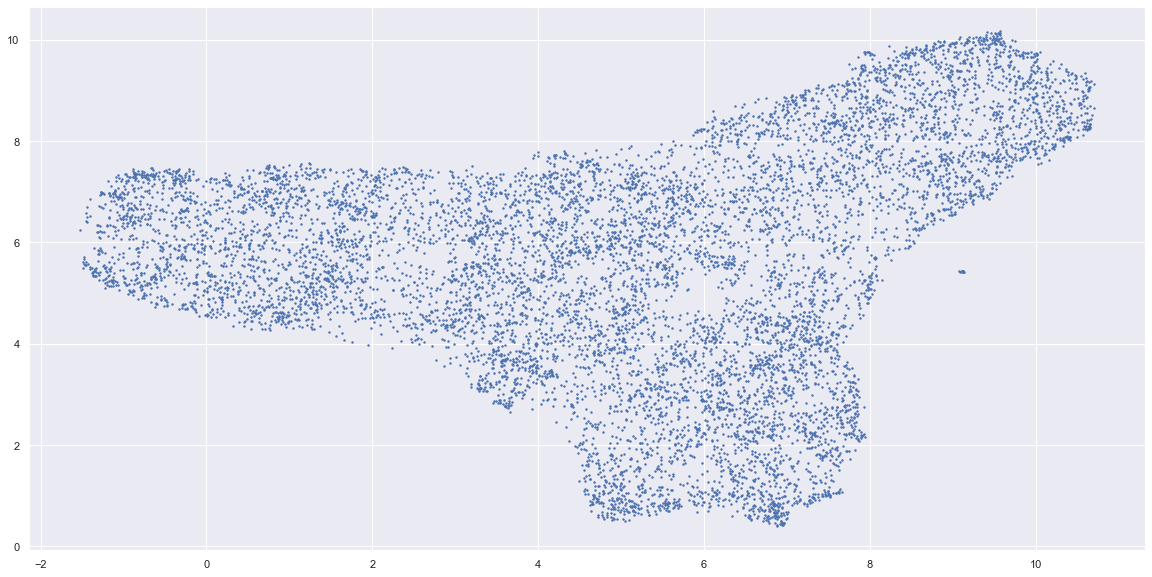

In [202]:
# Original code: https://antonsruberts.github.io/kproto-audience/
# changed some parts to fit the new umap version and as a part of debugging some lines.

#Preprocessing numerical
numerical = df.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer('yeo-johnson') # Yeo-Johnson by default, but specified to avoid confusion
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, densmap=False, densmap_kwds={}, output_dens=False)

embedding = embedding[0]
plt.figure(figsize=(20, 10))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [158]:
kprot_data = df.copy()
#Pre-processing
for c in df.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

categorical_columns = [1, 3, 4] # Specify

#Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 7)): # we are limiting the number of possible clusters
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|          | 0/5 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2317, ncost: 132814.64583680255
Run: 1, iteration: 2/100, moves: 592, ncost: 132134.49497671725
Run: 1, iteration: 3/100, moves: 284, ncost: 131939.0665576571
Run: 1, iteration: 4/100, moves: 154, ncost: 131885.6318956049
Run: 1, iteration: 5/100, moves: 97, ncost: 131864.1805400868
Run: 1, iteration: 6/100, moves: 46, ncost: 131859.0218219703
Run: 1, iteration: 7/100, moves: 27, ncost: 131857.0297370583
Run: 1, iteration: 8/100, moves: 15, ncost: 131856.3519122151
Run: 1, iteration: 9/100, moves: 7, ncost: 131856.26533573162
Run: 1, iteration: 10/100, moves: 1, ncost: 131856.25578691546
Run: 1, iteration: 11/100, moves: 0, ncost: 131856.25578691546
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2431, ncost: 132096.9615753027
Run: 2, iteration: 2/100, moves: 464, ncost: 131863.506458267
Run: 2, iteration: 3/10

 20%|██        | 1/5 [02:12<08:51, 132.89s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1823, ncost: 123102.08704557634
Run: 1, iteration: 2/100, moves: 450, ncost: 122757.11181988216
Run: 1, iteration: 3/100, moves: 633, ncost: 121471.1996515153
Run: 1, iteration: 4/100, moves: 1301, ncost: 117355.46490102496
Run: 1, iteration: 5/100, moves: 1212, ncost: 115299.24231153313
Run: 1, iteration: 6/100, moves: 520, ncost: 114937.77930220403
Run: 1, iteration: 7/100, moves: 222, ncost: 114869.93114094208
Run: 1, iteration: 8/100, moves: 95, ncost: 114857.26772587509
Run: 1, iteration: 9/100, moves: 53, ncost: 114853.26106425744
Run: 1, iteration: 10/100, moves: 20, ncost: 114852.47911139455
Run: 1, iteration: 11/100, moves: 11, ncost: 114852.12444263969
Run: 1, iteration: 12/100, moves: 3, ncost: 114852.08568565428
Run: 1, iteration: 13/100, moves: 0, ncost: 114852.08568565428
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, it

 40%|████      | 2/5 [04:52<07:25, 148.44s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4974, ncost: 114271.89149170203
Run: 1, iteration: 2/100, moves: 2057, ncost: 109581.32868001939
Run: 1, iteration: 3/100, moves: 752, ncost: 108949.60019408875
Run: 1, iteration: 4/100, moves: 384, ncost: 108777.75171966424
Run: 1, iteration: 5/100, moves: 198, ncost: 108729.19102444891
Run: 1, iteration: 6/100, moves: 100, ncost: 108716.51939647454
Run: 1, iteration: 7/100, moves: 54, ncost: 108712.25537514735
Run: 1, iteration: 8/100, moves: 42, ncost: 108708.16735444508
Run: 1, iteration: 9/100, moves: 37, ncost: 108706.00952877381
Run: 1, iteration: 10/100, moves: 19, ncost: 108704.94369537907
Run: 1, iteration: 11/100, moves: 28, ncost: 108702.73812540092
Run: 1, iteration: 12/100, moves: 166, ncost: 108629.69403098561
Run: 1, iteration: 13/100, moves: 141, ncost: 108601.56231836403
Run: 1, iteration: 14/100, moves: 113, ncost: 108579.13159219714
Run: 1, iteration: 15/

Starting iterations...
Run: 7, iteration: 1/100, moves: 2903, ncost: 116765.64486544282
Run: 7, iteration: 2/100, moves: 1708, ncost: 112337.89959458708
Run: 7, iteration: 3/100, moves: 1243, ncost: 110253.05400375163
Run: 7, iteration: 4/100, moves: 795, ncost: 109408.27244982611
Run: 7, iteration: 5/100, moves: 600, ncost: 108895.42392975475
Run: 7, iteration: 6/100, moves: 394, ncost: 108678.05832815691
Run: 7, iteration: 7/100, moves: 203, ncost: 108613.05254332154
Run: 7, iteration: 8/100, moves: 144, ncost: 108583.86706783116
Run: 7, iteration: 9/100, moves: 106, ncost: 108564.36781745474
Run: 7, iteration: 10/100, moves: 97, ncost: 108549.65952541928
Run: 7, iteration: 11/100, moves: 71, ncost: 108538.17084154529
Run: 7, iteration: 12/100, moves: 80, ncost: 108527.01523812521
Run: 7, iteration: 13/100, moves: 52, ncost: 108521.94251247433
Run: 7, iteration: 14/100, moves: 45, ncost: 108517.95683756862
Run: 7, iteration: 15/100, moves: 44, ncost: 108513.53927889375
Run: 7, iterat

 60%|██████    | 3/5 [10:04<07:26, 223.33s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4677, ncost: 105718.84720010235
Run: 1, iteration: 2/100, moves: 1833, ncost: 103331.8939498912
Run: 1, iteration: 3/100, moves: 669, ncost: 102926.73652035628
Run: 1, iteration: 4/100, moves: 401, ncost: 102756.90913493482
Run: 1, iteration: 5/100, moves: 305, ncost: 102648.5805336957
Run: 1, iteration: 6/100, moves: 228, ncost: 102588.64598267029
Run: 1, iteration: 7/100, moves: 187, ncost: 102549.39362360798
Run: 1, iteration: 8/100, moves: 139, ncost: 102521.8948020687
Run: 1, iteration: 9/100, moves: 138, ncost: 102496.06812676982
Run: 1, iteration: 10/100, moves: 134, ncost: 102472.22173444716
Run: 1, iteration: 11/100, moves: 110, ncost: 102457.6628703693
Run: 1, iteration: 12/100, moves: 79, ncost: 102450.91490120173
Run: 1, iteration: 13/100, moves: 65, ncost: 102446.57845234113
Run: 1, iteration: 14/100, moves: 57, ncost: 102443.28779802748
Run: 1, iteration: 15/10

Run: 4, iteration: 51/100, moves: 89, ncost: 102455.30289031434
Run: 4, iteration: 52/100, moves: 74, ncost: 102450.21139602001
Run: 4, iteration: 53/100, moves: 53, ncost: 102445.96910639801
Run: 4, iteration: 54/100, moves: 35, ncost: 102443.93534159636
Run: 4, iteration: 55/100, moves: 23, ncost: 102442.84086989354
Run: 4, iteration: 56/100, moves: 22, ncost: 102441.75977141489
Run: 4, iteration: 57/100, moves: 13, ncost: 102441.50202383166
Run: 4, iteration: 58/100, moves: 6, ncost: 102441.31697453062
Run: 4, iteration: 59/100, moves: 6, ncost: 102441.17478260497
Run: 4, iteration: 60/100, moves: 6, ncost: 102440.84366710273
Run: 4, iteration: 61/100, moves: 13, ncost: 102440.21496239386
Run: 4, iteration: 62/100, moves: 22, ncost: 102438.68841462513
Run: 4, iteration: 63/100, moves: 19, ncost: 102437.85851390248
Run: 4, iteration: 64/100, moves: 17, ncost: 102436.81737365879
Run: 4, iteration: 65/100, moves: 22, ncost: 102435.63538872267
Run: 4, iteration: 66/100, moves: 22, ncost

Run: 8, iteration: 8/100, moves: 131, ncost: 102869.77124915509
Run: 8, iteration: 9/100, moves: 153, ncost: 102843.1681762238
Run: 8, iteration: 10/100, moves: 149, ncost: 102817.19647883538
Run: 8, iteration: 11/100, moves: 148, ncost: 102789.1446822397
Run: 8, iteration: 12/100, moves: 116, ncost: 102768.41679130436
Run: 8, iteration: 13/100, moves: 111, ncost: 102752.37914193535
Run: 8, iteration: 14/100, moves: 81, ncost: 102744.66300358907
Run: 8, iteration: 15/100, moves: 58, ncost: 102738.72647110632
Run: 8, iteration: 16/100, moves: 72, ncost: 102731.1559850078
Run: 8, iteration: 17/100, moves: 75, ncost: 102721.94022490093
Run: 8, iteration: 18/100, moves: 72, ncost: 102711.60601694262
Run: 8, iteration: 19/100, moves: 66, ncost: 102702.95377959136
Run: 8, iteration: 20/100, moves: 64, ncost: 102696.92583191652
Run: 8, iteration: 21/100, moves: 35, ncost: 102694.5506451797
Run: 8, iteration: 22/100, moves: 48, ncost: 102689.48131045952
Run: 8, iteration: 23/100, moves: 46, nc

 80%|████████  | 4/5 [18:39<05:38, 338.23s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3250, ncost: 100307.21415633215
Run: 1, iteration: 2/100, moves: 1631, ncost: 97641.87932022997
Run: 1, iteration: 3/100, moves: 864, ncost: 96642.40976988184
Run: 1, iteration: 4/100, moves: 303, ncost: 96527.31912606113
Run: 1, iteration: 5/100, moves: 217, ncost: 96457.35592398193
Run: 1, iteration: 6/100, moves: 162, ncost: 96414.13967817296
Run: 1, iteration: 7/100, moves: 148, ncost: 96373.45353929925
Run: 1, iteration: 8/100, moves: 118, ncost: 96344.10323018665
Run: 1, iteration: 9/100, moves: 126, ncost: 96300.83406113536
Run: 1, iteration: 10/100, moves: 179, ncost: 96227.13902768565
Run: 1, iteration: 11/100, moves: 177, ncost: 96168.23320388857
Run: 1, iteration: 12/100, moves: 150, ncost: 96132.47276794467
Run: 1, iteration: 13/100, moves: 88, ncost: 96117.68762134833
Run: 1, iteration: 14/100, moves: 60, ncost: 96107.58973767355
Run: 1, iteration: 15/100, moves

Run: 5, iteration: 17/100, moves: 58, ncost: 96179.13461238898
Run: 5, iteration: 18/100, moves: 37, ncost: 96176.9989428531
Run: 5, iteration: 19/100, moves: 20, ncost: 96175.81709532802
Run: 5, iteration: 20/100, moves: 11, ncost: 96175.46342709358
Run: 5, iteration: 21/100, moves: 17, ncost: 96174.81254651693
Run: 5, iteration: 22/100, moves: 8, ncost: 96174.58780337888
Run: 5, iteration: 23/100, moves: 5, ncost: 96174.48684416774
Run: 5, iteration: 24/100, moves: 1, ncost: 96174.48427161563
Run: 5, iteration: 25/100, moves: 0, ncost: 96174.48427161563
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 4434, ncost: 101931.94399813983
Run: 6, iteration: 2/100, moves: 1770, ncost: 99572.3452248891
Run: 6, iteration: 3/100, moves: 1030, ncost: 98660.60711540248
Run: 6, iteration: 4/100, moves: 567, ncost: 98412.94519323473
Run: 6, iteration: 5/100, moves: 320, ncost: 98320.18588261542
Run: 6, iteration: 6/100, moves: 203, nc

Run: 10, iteration: 3/100, moves: 712, ncost: 98106.07603086927
Run: 10, iteration: 4/100, moves: 521, ncost: 97623.94512428141
Run: 10, iteration: 5/100, moves: 572, ncost: 97091.20376320161
Run: 10, iteration: 6/100, moves: 446, ncost: 96862.5619959569
Run: 10, iteration: 7/100, moves: 305, ncost: 96734.31771879198
Run: 10, iteration: 8/100, moves: 272, ncost: 96591.45377543125
Run: 10, iteration: 9/100, moves: 287, ncost: 96478.77036675984
Run: 10, iteration: 10/100, moves: 220, ncost: 96410.98783822116
Run: 10, iteration: 11/100, moves: 148, ncost: 96370.58892884412
Run: 10, iteration: 12/100, moves: 137, ncost: 96330.30037501274
Run: 10, iteration: 13/100, moves: 146, ncost: 96287.6073007927
Run: 10, iteration: 14/100, moves: 117, ncost: 96258.89972036931
Run: 10, iteration: 15/100, moves: 102, ncost: 96237.7359286037
Run: 10, iteration: 16/100, moves: 93, ncost: 96221.0232574184
Run: 10, iteration: 17/100, moves: 102, ncost: 96202.37292391693
Run: 10, iteration: 18/100, moves: 87

100%|██████████| 5/5 [26:45<00:00, 321.19s/it]


NameError: name 'go' is not defined

In [162]:
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

In [163]:
n_clusters

[2, 3, 4, 5, 6]

In [164]:
costs

[131856.20946515148,
 114852.08523546442,
 107497.76179226655,
 100854.59570648408,
 96094.96947929371]

In [170]:
clusters_assigned

[array([1, 0, 0, ..., 1, 0, 1], dtype=uint16),
 array([0, 1, 1, ..., 2, 1, 2], dtype=uint16),
 array([1, 0, 0, ..., 1, 0, 1], dtype=uint16),
 array([0, 2, 4, ..., 0, 3, 0], dtype=uint16),
 array([1, 5, 3, ..., 1, 4, 1], dtype=uint16)]

**Elbow spotted at 3 clusters**

In [205]:
#Actual clustering
kproto = KPrototypes(n_clusters= 3, init='Cao', n_jobs = -2)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()

0    4227
1    3312
2    2347
dtype: int64

In [207]:
clusters

array([0, 2, 2, ..., 1, 2, 1], dtype=uint16)

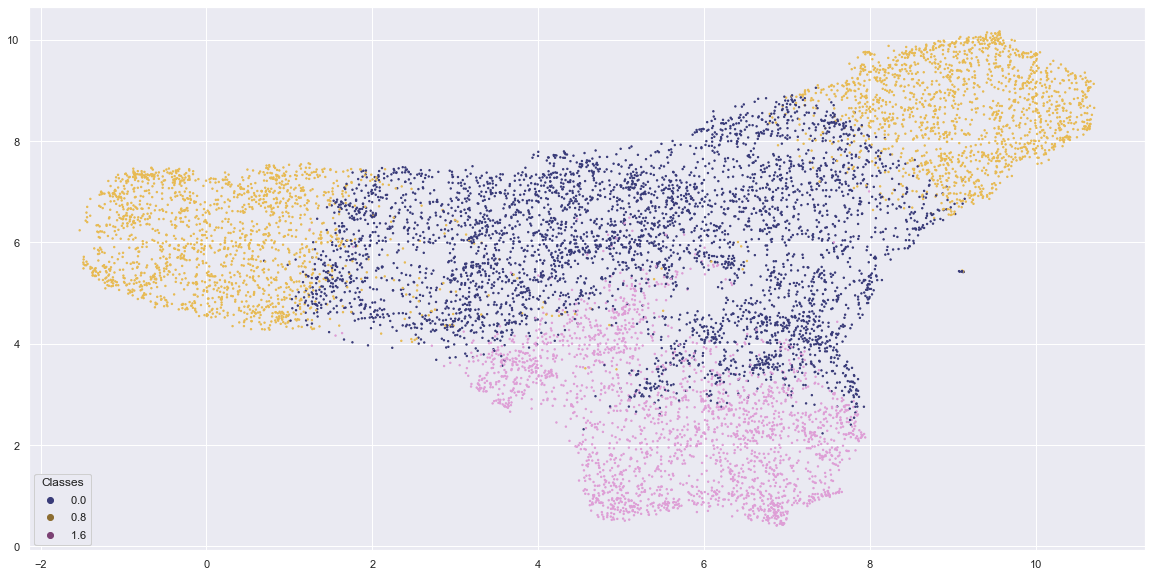

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=3),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [210]:
kprot_data

FirstPolYear EducDeg  MonthSal GeoLivArea Children  CustMonVal  \
CustID                                                                   
1          -0.163617       2 -0.304258        1.0      1.0    0.604808   
2          -0.766705       2 -1.972319        4.0      1.0   -1.578786   
3           0.751259       1 -0.201559        3.0      0.0    1.253598   
4           0.597922       3 -1.470342        4.0      1.0   -0.860917   
5          -0.011993       3 -0.737884        4.0      1.0   -0.558749   
...              ...     ...       ...        ...      ...         ...   
10291       1.213341       1 -2.035916        3.0      1.0    0.211316   
10292      -0.314899       4  0.705050        2.0      0.0   -0.740333   
10294       1.213341       3  0.441226        1.0      1.0    1.529851   
10295      -0.766705       1 -0.518222        2.0      1.0    0.126004   
10296       0.597922       4  0.339580        1.0      1.0    1.068423   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                                         
1        -0.937209   0.583358      -0.407198   -0.217855  0.405005 -0.356470   
2         1.441515  -1.646242       0.978033   -0.636139  2.428762  1.406013   
3        -1.250976  -0.633856       0.246704   -0.522068  1.094274  1.296569   
4         0.982821  -0.812030      -0.603354    1.764877  0.149727 -0.044837   
5         0.673754   0.323559      -0.577692    0.259682 -0.295742  0.258532   
...            ...        ...            ...         ...       ...       ...   
10291     0.505123  -2.301129       2.496375   -0.837779  1.476213  2.673041   
10292     0.879016   0.707043      -0.568307    0.146799 -0.621145 -0.421501   
10294    -1.443900   0.775116      -0.149501   -0.274159 -0.505732 -0.789309   
10295    -0.146762  -0.765777       0.191587    0.458546  0.725720  1.507820   
10296    -1.278863   0.846819      -0.331776   -0.287932 -0.752905 -0.482635   

        YearsAsCust  totalPremium  SalPremRatio  %PremMotor  %PremHousehold  \
CustID                                                                        
1          0.187617     -0.395939      0.000225    0.555878       -0.457790   
2          0.774733      0.983433      2.054722   -1.532897        1.171675   
3         -0.737234      0.083023      0.136036   -0.606879        0.520651   
4         -0.578909     -0.865207      1.177744   -0.494588       -0.755757   
5          0.037415     -0.651528      0.337645    0.456433       -0.730953   
...             ...           ...           ...         ...             ...   
10291     -1.223813      2.456447      2.119712   -1.958822        1.911876   
10292      0.336396     -0.562899     -0.905583    0.735386       -0.723710   
10294     -1.223813     -0.192684     -0.543326    0.611407       -0.046624   
10295      0.774733      0.283134      0.542985   -0.764684        0.374603   
10296     -0.578909     -0.368811     -0.550121    0.752389       -0.328098   

        %PremHealth  %PremLife  %PremWork  
CustID                                     
1          0.015235   0.745595  -0.382497  
2         -0.963783   1.980493   1.381024  
3         -0.509427   1.388436   1.559042  
4          2.120898   0.510313   0.213577  
5          0.635944  -0.248303   0.620018  
...             ...        ...        ...  
10291     -1.583128   1.014472   1.735703  
10292      0.475368  -0.756779  -0.455736  
10294     -0.136410  -0.645688  -1.014058  
10295      0.346106   0.948198   1.665669  
10296     -0.071092  -0.953394  -0.578529  

[9886 rows x 20 columns]

In [211]:
len(clusters)

9886